<a id="Jupyter"></a>
<h2>
    <font size="5" color = black >
        <span style='font-family:Georgia'>
            <center>Capstone Project - Social Media Tourism</center>
        </span>
    </font>
</h2>

<a id="Jupyter"></a>
<h2>
    <font size="5" color = black >
        <span style='font-family:Georgia'>
            <center>Machine Learning Model Building and Model Tuning</center>
        </span>
    </font>
</h2>

In [29]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics

# For plotting charts
import matplotlib.pyplot as plt

# For plotting in the current window
%matplotlib inline

In [30]:
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# To supress future warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [31]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth',2000)
pd.options.display.float_format='{:.5f}'.format

In [32]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [33]:
original_df = pd.read_csv('/content/drive/My Drive/DLDatasets/dsba-capstone-dataset/Social Media Data for DSBA.csv')
original_df.head()
original_df.tail()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.00000,iOS and Android,38570.00000,1,2,Financial,94.00000,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.00000,iOS,9765.00000,1,1,Financial,61.00000,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.00000,iOS and Android,48055.00000,1,2,Other,92.00000,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.00000,iOS,48720.00000,1,4,Financial,56.00000,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.00000,iOS and Android,20685.00000,1,1,Medical,40.00000,3468,9,No,12,No,4,1,6


,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
11755,1011756,No,279.00000,Laptop,30987.00000,23,2,Historical site,58.00000,2616,4,No,36,No,3,1,23
11756,1011757,No,305.00000,Tab,21510.00000,6,1,Historical site,55.00000,10041,4,No,30,No,1,1,11
11757,1011758,No,214.00000,Tab,5478.00000,4,3,Beach,103.00000,6203,3,Yes,40,Yes,2,1,12
11758,1011759,No,382.00000,Laptop,35851.00000,2,3,Historical site,83.00000,5444,3,No,32,No,4,0,20
11759,1011760,No,270.00000,Tab,22025.00000,8,3,Historical site,104.00000,4470,2,No,29,No,1,0,14


In [34]:
preprocessed_df = pd.read_csv("/content/drive/My Drive/DLDatasets/dsba-capstone-dataset/PreProcessed-SocialMediaData.csv")

In [35]:
preprocessed_df.head()
preprocessed_df.tail()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1,307.00000,2,38570.00000,1.00000,2,3,94.00000,5993.00000,8,1,11.00000,0,1,0,8.00000
1,0,367.00000,2,9765.00000,1.00000,1,3,61.00000,5130.00000,1,0,23.00000,1,4,1,10.00000
2,1,277.00000,2,48055.00000,1.00000,2,10,92.00000,2090.00000,6,1,15.00000,0,2,0,7.00000
3,0,247.00000,2,48720.00000,1.00000,4,3,56.00000,2909.00000,1,1,11.00000,0,3,0,8.00000
4,0,202.00000,2,20685.00000,1.00000,1,7,40.00000,3468.00000,9,0,12.00000,0,4,1,6.00000


,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
11755,0,279.00000,1,30987.00000,23.00000,2,6,58.00000,2616.00000,4,0,36.00000,0,3,1,23.00000
11756,0,305.00000,2,21510.00000,6.00000,1,6,55.00000,10041.00000,4,0,30.00000,0,1,1,11.00000
11757,0,214.00000,2,5478.00000,4.00000,3,0,103.00000,6203.00000,3,1,40.00000,1,2,1,12.00000
11758,0,382.00000,1,35851.00000,2.00000,3,6,83.00000,5444.00000,3,0,32.00000,0,4,0,20.00000
11759,0,270.00000,2,22025.00000,8.00000,3,6,104.00000,4470.00000,2,0,29.00000,0,1,0,14.00000


#### Splitting the data for Laptop and Mobile DataFrame

In [36]:
laptop_df = preprocessed_df[preprocessed_df['preferred_device'] == 1].drop('preferred_device', axis=1)
mobile_df = preprocessed_df[preprocessed_df['preferred_device'] == 2].drop('preferred_device', axis=1)
laptop_df.info()
print('\n\n\n')
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 5881 to 11758
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 1108 non-null   int64  
 1   Yearly_avg_view_on_travel_page                1108 non-null   float64
 2   total_likes_on_outstation_checkin_given       1108 non-null   float64
 3   yearly_avg_Outstation_checkins                1108 non-null   float64
 4   member_in_family                              1108 non-null   int64  
 5   preferred_location_type                       1108 non-null   int64  
 6   Yearly_avg_comment_on_travel_page             1108 non-null   float64
 7   total_likes_on_outofstation_checkin_received  1108 non-null   float64
 8   week_since_last_outstation_checkin            1108 non-null   int64  
 9   following_company_page                        1108 non-null

## Train and Test split for both users Laptop and Mobile

In [37]:
from sklearn.model_selection import train_test_split

laptop_train_df, laptop_test_df = train_test_split(laptop_df, test_size=0.30, random_state=123,
                                                   stratify= laptop_df.Taken_product)

print('The size of Train dataset for Laptop users are -', laptop_train_df.shape)
print('The size of Test dataset for Laptop users are -', laptop_test_df.shape)

The size of Train dataset for Laptop users are - (775, 15)
The size of Test dataset for Laptop users are - (333, 15)


In [38]:
laptop_df['Taken_product'].value_counts(normalize=True)
laptop_train_df['Taken_product'].value_counts(normalize=True)
laptop_test_df['Taken_product'].value_counts(normalize=True)

0   0.75090
1   0.24910
Name: Taken_product, dtype: float64

0   0.75097
1   0.24903
Name: Taken_product, dtype: float64

0   0.75075
1   0.24925
Name: Taken_product, dtype: float64

In [39]:
X_train_lp = laptop_train_df.iloc[:,1:15]
y_train_lp = laptop_train_df.iloc[:,0]
X_test_lp = laptop_test_df.iloc[:,1:15]
y_test_lp = laptop_test_df.iloc[:,0]

print('The size of X_train dataset for Laptop users are -', X_train_lp.shape)
print('The size of y_train dataset for Laptop users are -', y_train_lp.shape)
print('The size of X_test dataset for Laptop users are -', X_test_lp.shape)
print('The size of y_test dataset for Laptop users are -', y_test_lp.shape)

The size of X_train dataset for Laptop users are - (775, 14)
The size of y_train dataset for Laptop users are - (775,)
The size of X_test dataset for Laptop users are - (333, 14)
The size of y_test dataset for Laptop users are - (333,)


In [40]:
from sklearn.model_selection import train_test_split


mobile_train_df, mobile_test_df = train_test_split(mobile_df, test_size=0.30, random_state=123,
                                                   stratify= mobile_df.Taken_product)

print('The size of Train dataset for Mobile users are -', mobile_train_df.shape)
print('The size of Tes dataset for Mobile users are -', mobile_test_df.shape)

The size of Train dataset for Mobile users are - (7456, 15)
The size of Tes dataset for Mobile users are - (3196, 15)


In [41]:
X_train_mb = mobile_train_df.iloc[:,1:15]
y_train_mb = mobile_train_df.iloc[:,0]
X_test_mb = mobile_test_df.iloc[:,1:15]
y_test_mb = mobile_test_df.iloc[:,0]

print('The size of X_train dataset for Mobile users are -', X_train_mb.shape)
print('The size of y_train dataset for Mobile users are -', y_train_mb.shape)
print('The size of X_test dataset for Mobile users are -', X_test_mb.shape)
print('The size of y_test dataset for Mobile users are -', y_test_mb.shape)

The size of X_train dataset for Mobile users are - (7456, 14)
The size of y_train dataset for Mobile users are - (7456,)
The size of X_test dataset for Mobile users are - (3196, 14)
The size of y_test dataset for Mobile users are - (3196,)


## I. Logistic Regression Model

### Logistic Regression for Laptop users

In [42]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, SCORERS, f1_score, recall_score, precision_score, accuracy_score

In [43]:
lr_lp_model = LogisticRegression(random_state=123)
lr_lp_model.fit(X_train_lp,y_train_lp)

LogisticRegression(random_state=123)

In [44]:
y_lr_train_lp_predicted = lr_lp_model.predict(X_train_lp)
y_lr_test_lp_predicted = lr_lp_model.predict(X_test_lp)

print('Classification Report for Training data for Laptop Users-\n',classification_report(y_train_lp, y_lr_train_lp_predicted))
print('\n\n\nClassification Report for Test data for Laptop Users-\n',classification_report(y_test_lp, y_lr_test_lp_predicted))

Classification Report for Training data for Laptop Users-
               precision    recall  f1-score   support

           0       0.79      0.97      0.87       582
           1       0.69      0.21      0.32       193

    accuracy                           0.78       775
   macro avg       0.74      0.59      0.59       775
weighted avg       0.76      0.78      0.73       775




Classification Report for Test data for Laptop Users-
               precision    recall  f1-score   support

           0       0.79      0.98      0.87       250
           1       0.76      0.19      0.31        83

    accuracy                           0.78       333
   macro avg       0.77      0.59      0.59       333
weighted avg       0.78      0.78      0.73       333



In [45]:
y_lr_train_lp_prob_predicted = lr_lp_model.predict_proba(X_train_lp)
y_lr_test_lp_prob_predicted = lr_lp_model.predict_proba(X_test_lp)

y_lr_train_lp_predicted = [1 if i >= 0.29 else 0 for i in y_lr_train_lp_prob_predicted[:,1]]
y_lr_test_lp_predicted = [ 1 if i >= 0.29 else 0 for i in y_lr_test_lp_prob_predicted[:,1]]

print('Classification Report for Training data for Laptop Users-\n',classification_report(y_train_lp, y_lr_train_lp_predicted))
print('\n\n\nClassification Report for Test data for Laptop Users-\n',classification_report(y_test_lp, y_lr_test_lp_predicted))

Classification Report for Training data for Laptop Users-
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       582
           1       0.43      0.62      0.51       193

    accuracy                           0.70       775
   macro avg       0.64      0.67      0.64       775
weighted avg       0.75      0.70      0.71       775




Classification Report for Test data for Laptop Users-
               precision    recall  f1-score   support

           0       0.87      0.77      0.82       250
           1       0.49      0.66      0.56        83

    accuracy                           0.74       333
   macro avg       0.68      0.72      0.69       333
weighted avg       0.78      0.74      0.76       333



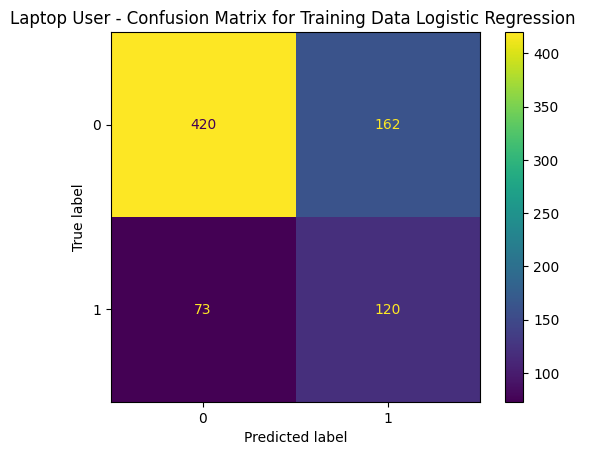

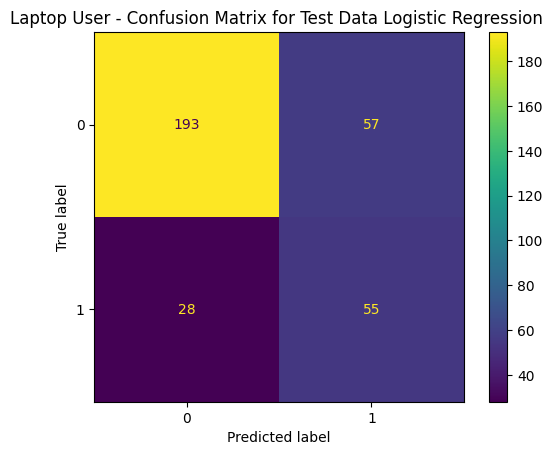

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

lr_lp_train_cm=confusion_matrix(y_train_lp, y_lr_train_lp_predicted)
lr_lp_test_cm=confusion_matrix(y_test_lp, y_lr_test_lp_predicted)

ConfusionMatrixDisplay(confusion_matrix=lr_lp_train_cm, display_labels=lr_lp_model.classes_).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Training Data Logistic Regression ')
plt.show();

ConfusionMatrixDisplay(confusion_matrix=lr_lp_test_cm, display_labels=lr_lp_model.classes_).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Test Data Logistic Regression ')
plt.show();

AUC for train data for Logistic Regression: 0.736
AUC for test data for Logistic Regression: 0.794


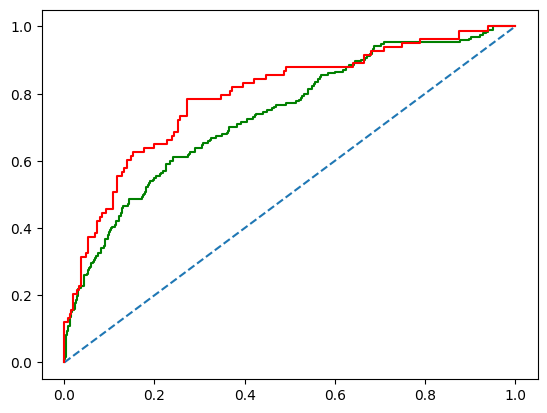

In [47]:
# Code to plot ROC AUC Curve for Classification Models

# predict probabilities
lr_lp_train_predicted = lr_lp_model.predict_proba(X_train_lp)
# keep probabilities for the positive outcome only
lr_lp_train_prob_predicted = lr_lp_train_predicted[:,1]
# calculate AUC
lr_lp_auc_train = roc_auc_score(y_train_lp, lr_lp_train_prob_predicted)
print('AUC for train data for Logistic Regression: %.3f' % lr_lp_auc_train)
#
# predict probabilities
lr_lp_test_predicted = lr_lp_model.predict_proba(X_test_lp)
# keep probabilities for the positive outcome only
lr_lp_test_prob_predicted = lr_lp_test_predicted[:,1]
# calculate AUC
lr_lp_auc_test = roc_auc_score(y_test_lp, lr_lp_test_prob_predicted)
print('AUC for test data for Logistic Regression: %.3f' % lr_lp_auc_test)

# calculate roc curve
lr_lp_train_fpr, lr_lp_train_tpr, lr_lp_train_thresholds = roc_curve(y_train_lp, lr_lp_train_prob_predicted)
lr_lp_test_fpr, lr_lp_test_tpr, lr_lp_test_thresholds = roc_curve(y_test_lp, lr_lp_test_prob_predicted)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_lp_train_fpr, lr_lp_train_tpr, color='g')
plt.plot(lr_lp_test_fpr, lr_lp_test_tpr, color='r')
plt.show();

In [48]:
lr_coef_df = pd.DataFrame({'Features': X_train_lp.columns.values, 'Coefficients':lr_lp_model.coef_[0]})
lr_coef_df

,Features,Coefficients
0,Yearly_avg_view_on_travel_page,-0.00248
1,total_likes_on_outstation_checkin_given,-0.00002
2,yearly_avg_Outstation_checkins,0.02901
3,member_in_family,0.00327
4,preferred_location_type,0.02938
5,Yearly_avg_comment_on_travel_page,0.01372
6,total_likes_on_outofstation_checkin_received,-0.00007
7,week_since_last_outstation_checkin,0.06095
8,following_company_page,0.03281
9,montly_avg_comment_on_company_page,-0.00086


### Tuned Logistic Regression for Laptop users

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
hyper_parameters = {
    'solver': ['liblinear','newton-cg','sag', 'lbfgs'],
    'penalty': ['l1','l2','None'],
    'tol': [0.01, 0.001],
    'max_iter': [100, 1000, 10000, 100000]
}

lr_lp_tuned = LogisticRegression()

lr_gs_lp_model = GridSearchCV(estimator=lr_lp_tuned,
                                   param_grid = hyper_parameters,
                                   cv = 5,
                                   verbose = True,
                                   n_jobs=-1)

lr_gs_lp_model.fit(X_train_lp,y_train_lp)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [100, 1000, 10000, 100000],
                         'penalty': ['l1', 'l2', 'None'],
                         'solver': ['liblinear', 'newton-cg', 'sag', 'lbfgs'],
                         'tol': [0.01, 0.001]},
             verbose=True)

In [51]:
lr_gs_lp_model.best_params_

{'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}

In [52]:
y_gs_lr_train_lp_predicted = lr_gs_lp_model.predict(X_train_lp)
y_gs_lr_test_lp_predicted = lr_gs_lp_model.predict(X_test_lp)

print('Classification Report for Training data for Laptop Users-\n',classification_report(y_train_lp, y_gs_lr_train_lp_predicted))
print('\n\n\nClassification Report for Test data for Laptop Users-\n',classification_report(y_test_lp, y_gs_lr_test_lp_predicted))

Classification Report for Training data for Laptop Users-
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       582
           1       0.76      0.45      0.57       193

    accuracy                           0.83       775
   macro avg       0.80      0.70      0.73       775
weighted avg       0.82      0.83      0.81       775




Classification Report for Test data for Laptop Users-
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       250
           1       0.80      0.42      0.55        83

    accuracy                           0.83       333
   macro avg       0.81      0.69      0.72       333
weighted avg       0.82      0.83      0.81       333



In [53]:
y_gs_lr_train_lp_prob_predicted = lr_gs_lp_model.predict_proba(X_train_lp)
y_gs_lr_test_lp_prob_predicted = lr_gs_lp_model.predict_proba(X_test_lp)

y_gs_lr_train_lp_predicted = [1 if i >= 0.29 else 0 for i in y_gs_lr_train_lp_prob_predicted[:,1]]
y_gs_lr_test_lp_predicted = [1 if i >= 0.29 else 0 for i in y_gs_lr_test_lp_prob_predicted[:,1]]

print('Classification Report for Training data for Laptop Users-\n',classification_report(y_train_lp, y_gs_lr_train_lp_predicted))
print('\n\n\nClassification Report for Test data for Laptop Users-\n',classification_report(y_test_lp, y_gs_lr_test_lp_predicted))

Classification Report for Training data for Laptop Users-
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       582
           1       0.56      0.69      0.62       193

    accuracy                           0.79       775
   macro avg       0.72      0.76      0.74       775
weighted avg       0.81      0.79      0.79       775




Classification Report for Test data for Laptop Users-
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       250
           1       0.60      0.67      0.63        83

    accuracy                           0.80       333
   macro avg       0.74      0.76      0.75       333
weighted avg       0.81      0.80      0.81       333



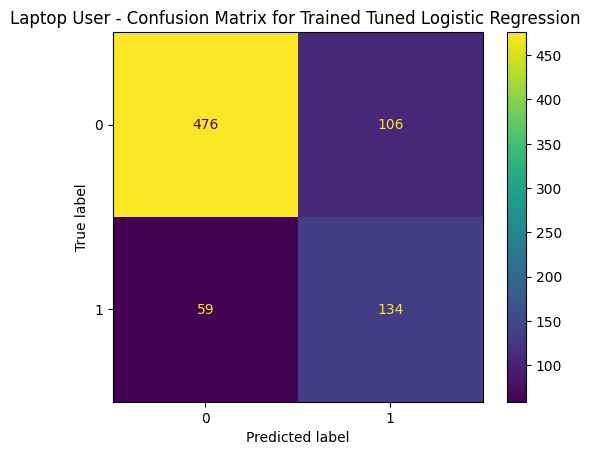

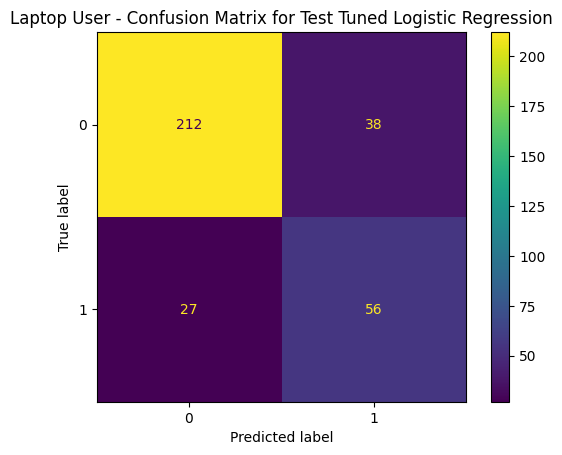

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

lr_gs_lp_train_cm= confusion_matrix(y_train_lp, y_gs_lr_train_lp_predicted)
lr_gs_lp_test_cm=confusion_matrix(y_test_lp, y_gs_lr_test_lp_predicted)

ConfusionMatrixDisplay(confusion_matrix=lr_gs_lp_train_cm, display_labels=lr_gs_lp_model.classes_).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Trained Tuned Logistic Regression ')
plt.show();

ConfusionMatrixDisplay(confusion_matrix=lr_gs_lp_test_cm, display_labels=lr_gs_lp_model.classes_).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Test Tuned Logistic Regression')
plt.show();

AUC for train data for Logistic Regression: 0.821
AUC for test data for Logistic Regression: 0.851


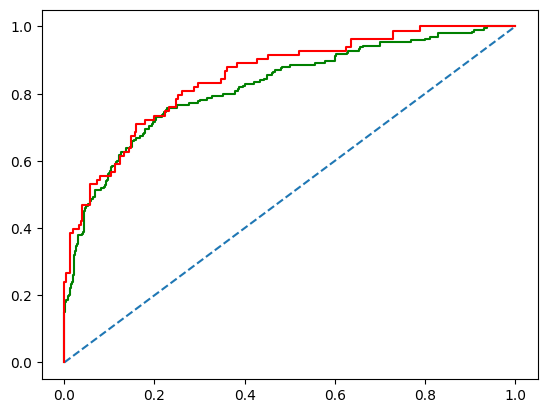

In [55]:
# Code to plot ROC AUC Curve for Classification Models

# predict probabilities
lr_gs_lp_train_predicted = lr_gs_lp_model.predict_proba(X_train_lp)
# keep probabilities for the positive outcome only
lr_gs_lp_train_prob_predicted = lr_gs_lp_train_predicted[:,1]
# calculate AUC
lr_gs_lp_auc_train = roc_auc_score(y_train_lp, lr_gs_lp_train_prob_predicted)
print('AUC for train data for Logistic Regression: %.3f' % lr_gs_lp_auc_train)
#
# predict probabilities
lr_gs_lp_test_predicted = lr_gs_lp_model.predict_proba(X_test_lp)
# keep probabilities for the positive outcome only
lr_gs_lp_test_prob_predicted = lr_gs_lp_test_predicted[:,1]
# calculate AUC
lr_gs_lp_auc_test = roc_auc_score(y_test_lp, lr_gs_lp_test_prob_predicted)
print('AUC for test data for Logistic Regression: %.3f' % lr_gs_lp_auc_test)

# calculate roc curve
lr_gs_lp_train_fpr, lr_gs_lp_train_tpr, lr_gs_lp_train_thresholds = roc_curve(y_train_lp, lr_gs_lp_train_prob_predicted)
lr_gs_lp_test_fpr, lr_gs_lp_test_tpr, lr_gs_lp_test_thresholds = roc_curve(y_test_lp, lr_gs_lp_test_prob_predicted)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_gs_lp_train_fpr, lr_gs_lp_train_tpr, color='g')
plt.plot(lr_gs_lp_test_fpr, lr_gs_lp_test_tpr, color='r')
plt.show();

### Logistic Regression for Mobile users

In [56]:
from sklearn.linear_model import LogisticRegression
lr_mb_model = LogisticRegression(random_state=123)
lr_mb_model.fit(X_train_mb,y_train_mb)

LogisticRegression(random_state=123)

In [57]:
y_lr_train_mb_prob_predicted = lr_mb_model.predict_proba(X_train_mb)
y_lr_test_mb_prob_predicted = lr_mb_model.predict_proba(X_test_mb)

y_lr_train_mb_predicted = [1 if i >= 0.29 else 0 for i in y_lr_train_mb_prob_predicted[:,1]]
y_lr_test_mb_predicted = [ 1 if i >= 0.29 else 0 for i in y_lr_test_mb_prob_predicted[:,1]]

print('Classification Report for Training data for Mobile Users-\n',classification_report(y_train_mb, y_lr_train_mb_predicted))
print('\n\n\nClassification Report for Test data for Mobile Users-\n',classification_report(y_test_mb, y_lr_test_mb_predicted))

Classification Report for Training data for Mobile Users-
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      6322
           1       0.39      0.16      0.22      1134

    accuracy                           0.83      7456
   macro avg       0.63      0.56      0.57      7456
weighted avg       0.79      0.83      0.80      7456




Classification Report for Test data for Mobile Users-
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      2710
           1       0.43      0.18      0.26       486

    accuracy                           0.84      3196
   macro avg       0.65      0.57      0.58      3196
weighted avg       0.80      0.84      0.81      3196



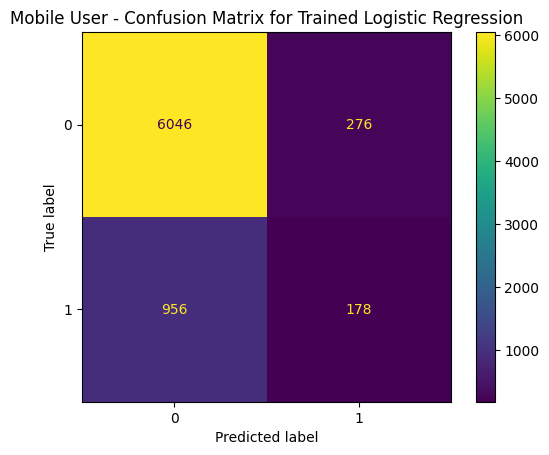

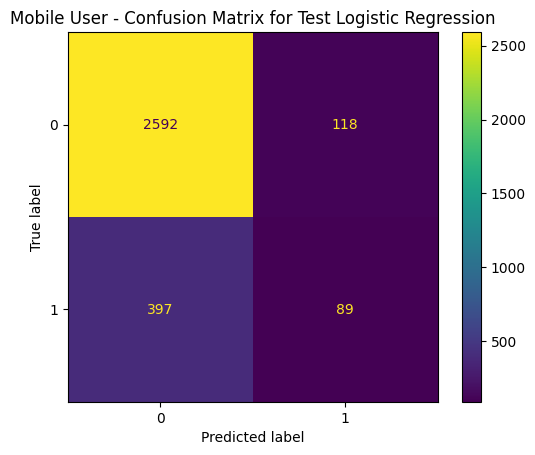

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay

lr_mb_train_cm=confusion_matrix(y_train_mb, y_lr_train_mb_predicted)
lr_mb_test_cm=confusion_matrix(y_test_mb, y_lr_test_mb_predicted)

ConfusionMatrixDisplay(confusion_matrix=lr_mb_train_cm, display_labels=lr_mb_model.classes_).plot()
plt.grid(False)
plt.title('Mobile User - Confusion Matrix for Trained Logistic Regression')
plt.show();

ConfusionMatrixDisplay(confusion_matrix=lr_mb_test_cm, display_labels=lr_mb_model.classes_).plot()
plt.grid(False)
plt.title('Mobile User - Confusion Matrix for Test Logistic Regression')
plt.show();

AUC for train data for Logistic Regression: 0.683
AUC for test data for Logistic Regression: 0.707


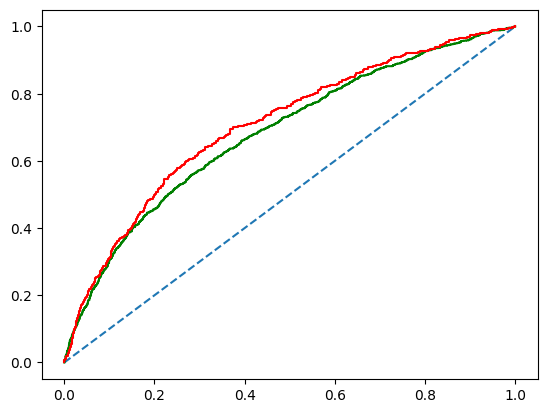

In [59]:
# Code to plot ROC AUC Curve for Classification Models

# predict probabilities
lr_mb_train_predicted = lr_mb_model.predict_proba(X_train_mb)
# keep probabilities for the positive outcome only
lr_mb_train_prob_predicted = lr_mb_train_predicted[:,1]
# calculate AUC
lr_mb_auc_train = roc_auc_score(y_train_mb, lr_mb_train_prob_predicted)
print('AUC for train data for Logistic Regression: %.3f' % lr_mb_auc_train)
#
# predict probabilities
lr_mb_test_predicted = lr_mb_model.predict_proba(X_test_mb)
# keep probabilities for the positive outcome only
lr_mb_test_prob_predicted = lr_mb_test_predicted[:,1]
# calculate AUC
lr_mb_auc_test = roc_auc_score(y_test_mb, lr_mb_test_prob_predicted)
print('AUC for test data for Logistic Regression: %.3f' % lr_mb_auc_test)

# calculate roc curve
lr_mb_train_fpr, lr_mb_train_tpr, lr_mb_train_thresholds = roc_curve(y_train_mb, lr_mb_train_prob_predicted)
lr_mb_test_fpr, lr_mb_test_tpr, lr_mb_test_thresholds = roc_curve(y_test_mb, lr_mb_test_prob_predicted)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_mb_train_fpr, lr_mb_train_tpr, color='g')
plt.plot(lr_mb_test_fpr, lr_mb_test_tpr, color='r')
plt.show();

In [60]:
lr_mb_coef_df = pd.DataFrame({'Features': X_train_mb.columns.values, 'Coefficients':lr_mb_model.coef_[0]})
lr_mb_coef_df

,Features,Coefficients
0,Yearly_avg_view_on_travel_page,-0.00289
1,total_likes_on_outstation_checkin_given,-0.00001
2,yearly_avg_Outstation_checkins,0.02443
3,member_in_family,0.00237
4,preferred_location_type,0.03003
5,Yearly_avg_comment_on_travel_page,-0.00033
6,total_likes_on_outofstation_checkin_received,-0.00005
7,week_since_last_outstation_checkin,0.09639
8,following_company_page,0.04541
9,montly_avg_comment_on_company_page,-0.02178


### Tuned Logistic Regression for Mobile users

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
hyper_parameters = {
    'solver': ['liblinear','newton-cg','sag', 'lbfgs'],
    'penalty': ['l1','l2','None'],
    'tol': [0.01, 0.001],
    'max_iter': [100, 1000, 10000, 100000]
}

lr_mb_model_tuned = LogisticRegression()

lr_gs_mb_model = GridSearchCV(estimator=lr_mb_model_tuned,
                                   param_grid = hyper_parameters,
                                   cv = 5,
                                   verbose = True,
                                   n_jobs=-1)

lr_gs_mb_model.fit(X_train_mb,y_train_mb)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [100, 1000, 10000, 100000],
                         'penalty': ['l1', 'l2', 'None'],
                         'solver': ['liblinear', 'newton-cg', 'sag', 'lbfgs'],
                         'tol': [0.01, 0.001]},
             verbose=True)

In [63]:
lr_gs_mb_model.best_params_

{'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}

In [64]:
y_gs_lr_train_mb_prob_predicted = lr_gs_mb_model.predict_proba(X_train_mb)
y_gs_lr_test_mb_prob_predicted = lr_gs_mb_model.predict_proba(X_test_mb)

y_gs_lr_train_mb_predicted = [1 if i >= 0.29 else 0 for i in y_gs_lr_train_mb_prob_predicted[:,1]]
y_gs_lr_test_mb_predicted = [1 if i >= 0.29 else 0 for i in y_gs_lr_test_mb_prob_predicted[:,1]]

print('Classification Report for Training data for Laptop Users-\n',classification_report(y_train_mb, y_gs_lr_train_mb_predicted))
print('\n\n\nClassification Report for Test data for Laptop Users-\n',classification_report(y_test_mb, y_gs_lr_test_mb_predicted))

Classification Report for Training data for Laptop Users-
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      6322
           1       0.48      0.46      0.47      1134

    accuracy                           0.84      7456
   macro avg       0.69      0.69      0.69      7456
weighted avg       0.84      0.84      0.84      7456




Classification Report for Test data for Laptop Users-
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      2710
           1       0.45      0.40      0.42       486

    accuracy                           0.83      3196
   macro avg       0.67      0.66      0.66      3196
weighted avg       0.83      0.83      0.83      3196



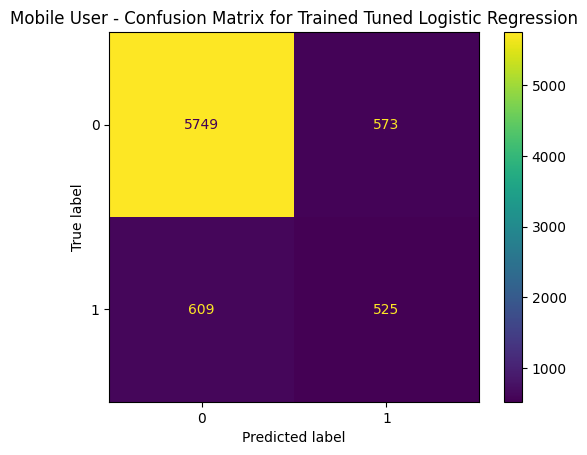

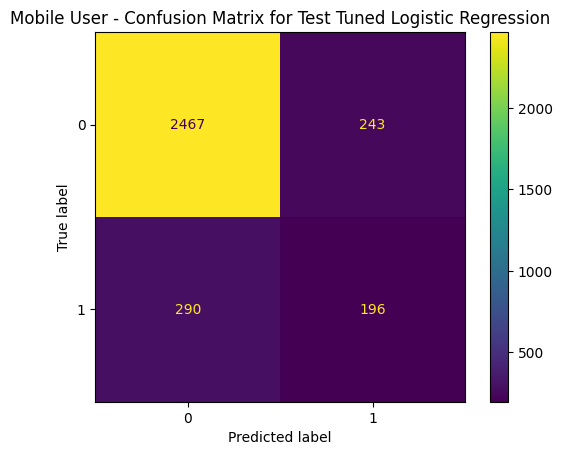

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay

lr_gs_mb_train_cm=confusion_matrix(y_train_mb, y_gs_lr_train_mb_predicted)
lr_gs_mb_test_cm=confusion_matrix(y_test_mb, y_gs_lr_test_mb_predicted)

ConfusionMatrixDisplay(confusion_matrix=lr_gs_mb_train_cm, display_labels=lr_gs_mb_model.classes_).plot()
plt.grid(False)
plt.title('Mobile User - Confusion Matrix for Trained Tuned Logistic Regression')
plt.show();

ConfusionMatrixDisplay(confusion_matrix=lr_gs_mb_test_cm, display_labels=lr_gs_mb_model.classes_).plot()
plt.grid(False)
plt.title('Mobile User - Confusion Matrix for Test Tuned Logistic Regression')
plt.show();

AUC for train data for Logistic Regression: 0.786
AUC for test data for Logistic Regression: 0.788


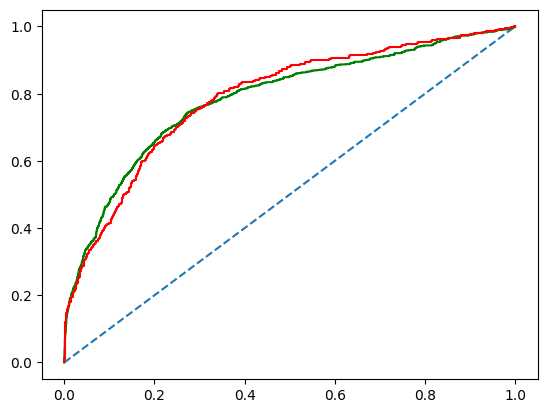

In [66]:
# Code to plot ROC AUC Curve for Classification Models

# predict probabilities
lr_gs_mb_train_predicted = lr_gs_mb_model.predict_proba(X_train_mb)
# keep probabilities for the positive outcome only
lr_gs_mb_train_prob_predicted = lr_gs_mb_train_predicted[:,1]
# calculate AUC
lr_gs_mb_auc_train = roc_auc_score(y_train_mb, lr_gs_mb_train_prob_predicted)
print('AUC for train data for Logistic Regression: %.3f' % lr_gs_mb_auc_train)
#
# predict probabilities
lr_gs_mb_test_predicted = lr_gs_mb_model.predict_proba(X_test_mb)
# keep probabilities for the positive outcome only
lr_gs_mb_test_prob_predicted = lr_gs_mb_test_predicted[:,1]
# calculate AUC
lr_gs_mb_auc_test = roc_auc_score(y_test_mb, lr_gs_mb_test_prob_predicted)
print('AUC for test data for Logistic Regression: %.3f' % lr_gs_mb_auc_test)

# calculate roc curve
lr_gs_mb_train_fpr, lr_gs_mb_train_tpr, lr_gs_mb_train_thresholds = roc_curve(y_train_mb, lr_gs_mb_train_prob_predicted)
lr_gs_mb_test_fpr, lr_gs_mb_test_tpr, lr_gs_mb_test_thresholds = roc_curve(y_test_mb, lr_gs_mb_test_prob_predicted)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_gs_mb_train_fpr, lr_gs_mb_train_tpr, color='g')
plt.plot(lr_gs_mb_test_fpr, lr_gs_mb_test_tpr, color='r')
plt.show();

## II. Decision Tree Classifier

### Decision Tree Classifier for Laptop users

In [67]:
from sklearn.tree import DecisionTreeClassifier

lp_dt_model = DecisionTreeClassifier(random_state=123)
lp_dt_model.fit(X_train_lp, y_train_lp)

DecisionTreeClassifier(random_state=123)

In [68]:
y_dt_train_lp_predicted = lp_dt_model.predict(X_train_lp)
y_dt_test_lp_predicted = lp_dt_model.predict(X_test_lp)

print('Classification Report for Training data for Laptop Users-\n',classification_report(y_train_lp, y_dt_train_lp_predicted))
print('\n\n\nClassification Report for Test data for Laptop Users-\n',classification_report(y_test_lp, y_dt_test_lp_predicted))

Classification Report for Training data for Laptop Users-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      1.00      1.00       193

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775




Classification Report for Test data for Laptop Users-
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       250
           1       0.87      0.86      0.86        83

    accuracy                           0.93       333
   macro avg       0.91      0.91      0.91       333
weighted avg       0.93      0.93      0.93       333



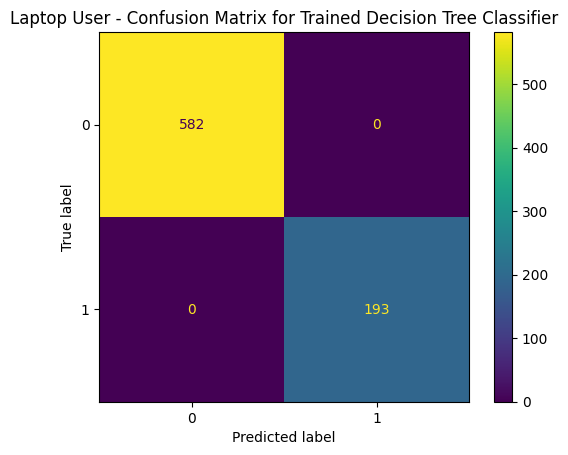

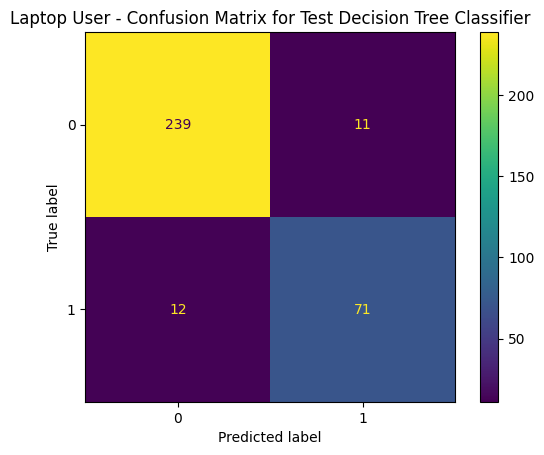

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

dt_lp_train_cm=confusion_matrix(y_train_lp, y_dt_train_lp_predicted)
dt_lp_test_cm=confusion_matrix(y_test_lp, y_dt_test_lp_predicted)

ConfusionMatrixDisplay(confusion_matrix=dt_lp_train_cm, display_labels=lp_dt_model.classes_).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Trained Decision Tree Classifier')
plt.show();

ConfusionMatrixDisplay(confusion_matrix=dt_lp_test_cm, display_labels=lp_dt_model.classes_).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Test Decision Tree Classifier')
plt.show();

AUC for train data for Logistic Regression: 1.000
AUC for test data for Logistic Regression: 0.906


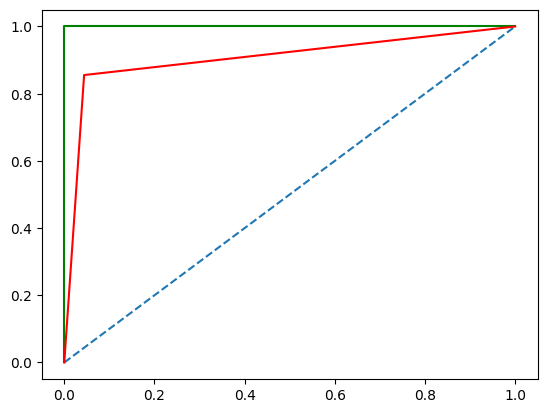

In [70]:
# Code to plot ROC AUC Curve for Classification Models

# predict probabilities
dt_lp_train_predicted = lp_dt_model.predict_proba(X_train_lp)
# keep probabilities for the positive outcome only
dt_lp_train_prob_predicted = dt_lp_train_predicted[:,1]
# calculate AUC
dt_lp_auc_train = roc_auc_score(y_train_lp, dt_lp_train_prob_predicted)
print('AUC for train data for Logistic Regression: %.3f' % dt_lp_auc_train)
#
# predict probabilities
dt_lp_test_predicted = lp_dt_model.predict_proba(X_test_lp)
# keep probabilities for the positive outcome only
dt_lp_test_prob_predicted = dt_lp_test_predicted[:,1]
# calculate AUC
dt_lp_auc_test = roc_auc_score(y_test_lp, dt_lp_test_prob_predicted)
print('AUC for test data for Logistic Regression: %.3f' % dt_lp_auc_test)

# calculate roc curve
dt_lp_train_fpr, dt_lp_train_tpr, dt_lp_train_thresholds = roc_curve(y_train_lp, dt_lp_train_prob_predicted)
dt_lp_test_fpr, dt_lp_test_tpr, dt_lp_test_thresholds = roc_curve(y_test_lp, dt_lp_test_prob_predicted)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_lp_train_fpr, dt_lp_train_tpr, color='g')
plt.plot(dt_lp_test_fpr, dt_lp_test_tpr, color='r')
plt.show();

### Tuned Decision Tree Classifier for Laptop users

In [71]:
hyper_parameters = {
    'criterion':['gini','entropy','log_loss'],
    'max_depth' : [5,10,15,20,25,30],  #maximum number of levels allowed in each decision tree
    'min_samples_split' : [3,6,9,12,15,30,35,39,42,45], # minimum sample number to split a node
    'min_samples_leaf' : [9,12,15,18,21,24]
}

lp_dt_model_tuned = DecisionTreeClassifier(random_state=123)

lp_gs_dt_model = GridSearchCV(estimator=lp_dt_model_tuned,
                                   param_grid=hyper_parameters,
                                   cv = 5,
                                   verbose=True,
                                   n_jobs=-1)

lp_gs_dt_model.fit(X_train_lp, y_train_lp)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [9, 12, 15, 18, 21, 24],
                         'min_samples_split': [3, 6, 9, 12, 15, 30, 35, 39, 42,
                                               45]},
             verbose=True)

In [72]:
lp_gs_dt_model.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 12,
 'min_samples_split': 35}

In [73]:
y_gs_dt_train_lp_predicted = lp_gs_dt_model.predict(X_train_lp)
y_gs_dt_test_lp_predicted = lp_gs_dt_model.predict(X_test_lp)

print('Classification Report for Training data for Laptop Users-\n',classification_report(y_train_lp, y_gs_dt_train_lp_predicted))
print('\n\n\nClassification Report for Test data for Laptop Users-\n',classification_report(y_test_lp, y_gs_dt_test_lp_predicted))

Classification Report for Training data for Laptop Users-
               precision    recall  f1-score   support

           0       0.87      0.97      0.91       582
           1       0.84      0.56      0.67       193

    accuracy                           0.86       775
   macro avg       0.86      0.76      0.79       775
weighted avg       0.86      0.86      0.85       775




Classification Report for Test data for Laptop Users-
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       250
           1       0.73      0.52      0.61        83

    accuracy                           0.83       333
   macro avg       0.79      0.73      0.75       333
weighted avg       0.82      0.83      0.82       333



In [74]:
y_gs_dt_train_lp_prob_predicted = lp_gs_dt_model.predict_proba(X_train_lp)
y_gs_dt_test_lp_prob_predicted = lp_gs_dt_model.predict_proba(X_test_lp)

y_gs_dt_train_lp_predicted = [1 if i >= 0.29 else 0 for i in y_gs_dt_train_lp_prob_predicted[:,1]]
y_gs_dt_test_lp_predicted = [1 if i >= 0.29 else 0 for i in y_gs_dt_test_lp_prob_predicted[:,1]]

print('Classification Report for Training data for Laptop Users-\n',classification_report(y_train_lp, y_gs_dt_train_lp_predicted))
print('\n\n\nClassification Report for Test data for Laptop Users-\n',classification_report(y_test_lp, y_gs_dt_test_lp_predicted))

Classification Report for Training data for Laptop Users-
               precision    recall  f1-score   support

           0       0.95      0.80      0.87       582
           1       0.60      0.89      0.71       193

    accuracy                           0.82       775
   macro avg       0.78      0.84      0.79       775
weighted avg       0.87      0.82      0.83       775




Classification Report for Test data for Laptop Users-
               precision    recall  f1-score   support

           0       0.94      0.78      0.85       250
           1       0.56      0.86      0.68        83

    accuracy                           0.80       333
   macro avg       0.75      0.82      0.77       333
weighted avg       0.85      0.80      0.81       333



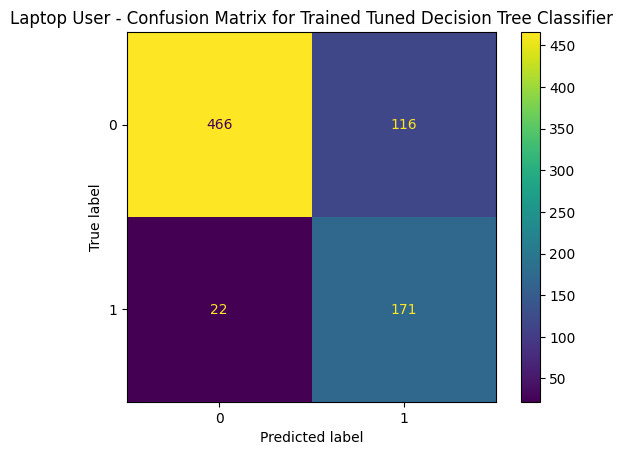

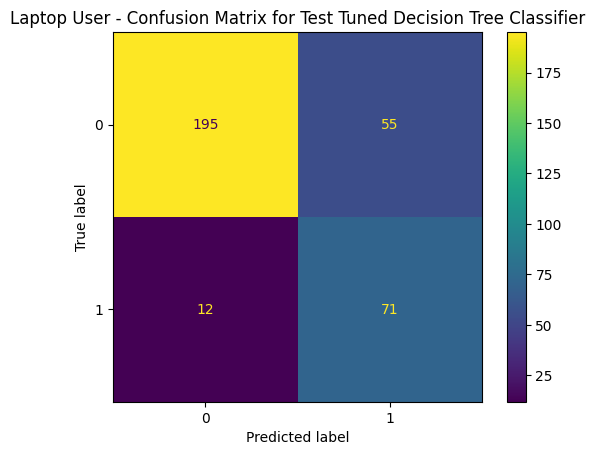

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay

dt_gs_lp_train_cm=confusion_matrix(y_train_lp, y_gs_dt_train_lp_predicted)
dt_gs_lp_test_cm=confusion_matrix(y_test_lp, y_gs_dt_test_lp_predicted)

ConfusionMatrixDisplay(confusion_matrix=dt_gs_lp_train_cm, display_labels=lp_gs_dt_model.classes_).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Trained Tuned Decision Tree Classifier')
plt.show();

ConfusionMatrixDisplay(confusion_matrix=dt_gs_lp_test_cm, display_labels=lp_gs_dt_model.classes_).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Test Tuned Decision Tree Classifier')
plt.show();

AUC for train data for Logistic Regression: 0.926
AUC for test data for Logistic Regression: 0.887


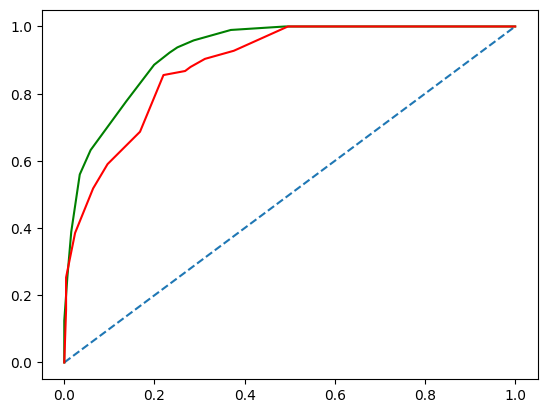

In [76]:
# Code to plot ROC AUC Curve for Classification Models

# predict probabilities
dt_gs_lp_train_predicted = lp_gs_dt_model.predict_proba(X_train_lp)
# keep probabilities for the positive outcome only
dt_gs_lp_train_prob_predicted = dt_gs_lp_train_predicted[:,1]
# calculate AUC
dt_gs_lp_auc_train = roc_auc_score(y_train_lp, dt_gs_lp_train_prob_predicted)
print('AUC for train data for Logistic Regression: %.3f' % dt_gs_lp_auc_train)
#
# predict probabilities
dt_gs_lp_test_predicted = lp_gs_dt_model.predict_proba(X_test_lp)
# keep probabilities for the positive outcome only
dt_gs_lp_test_prob_predicted = dt_gs_lp_test_predicted[:,1]
# calculate AUC
dt_gs_lp_auc_test = roc_auc_score(y_test_lp, dt_gs_lp_test_prob_predicted)
print('AUC for test data for Logistic Regression: %.3f' % dt_gs_lp_auc_test)

# calculate roc curve
dt_gs_lp_train_fpr, dt_gs_lp_train_tpr, dt_gs_lp_train_thresholds = roc_curve(y_train_lp, dt_gs_lp_train_prob_predicted)
dt_gs_lp_test_fpr, dt_gs_lp_test_tpr, dt_gs_lp_test_thresholds = roc_curve(y_test_lp, dt_gs_lp_test_prob_predicted)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_gs_lp_train_fpr, dt_gs_lp_train_tpr, color='g')
plt.plot(dt_gs_lp_test_fpr, dt_gs_lp_test_tpr, color='r')
plt.show();

### Decision Tree Classifier for Mobile users

In [77]:
from sklearn.tree import DecisionTreeClassifier

mb_dt_model = DecisionTreeClassifier(random_state=123)
mb_dt_model.fit(X_train_mb, y_train_mb)

DecisionTreeClassifier(random_state=123)

In [78]:
y_dt_train_mb_predicted = mb_dt_model.predict(X_train_mb)
y_dt_test_mb_predicted = mb_dt_model.predict(X_test_mb)

print('Classification Report for Training data for Laptop Users-\n',classification_report(y_train_mb, y_dt_train_mb_predicted))
print('\n\n\nClassification Report for Test data for Laptop Users-\n',classification_report(y_test_mb, y_dt_test_mb_predicted))

Classification Report for Training data for Laptop Users-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6322
           1       1.00      1.00      1.00      1134

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456




Classification Report for Test data for Laptop Users-
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2710
           1       0.92      0.89      0.91       486

    accuracy                           0.97      3196
   macro avg       0.95      0.94      0.95      3196
weighted avg       0.97      0.97      0.97      3196



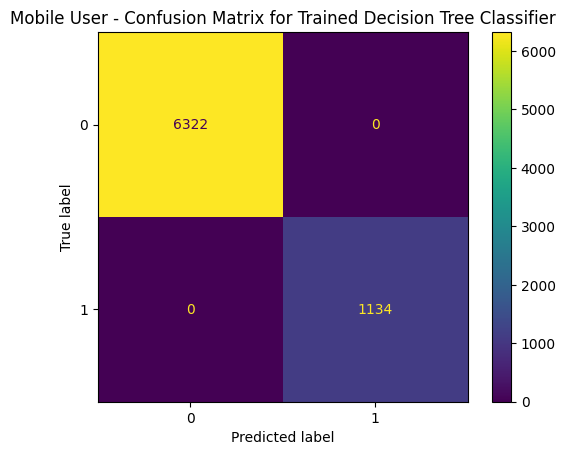

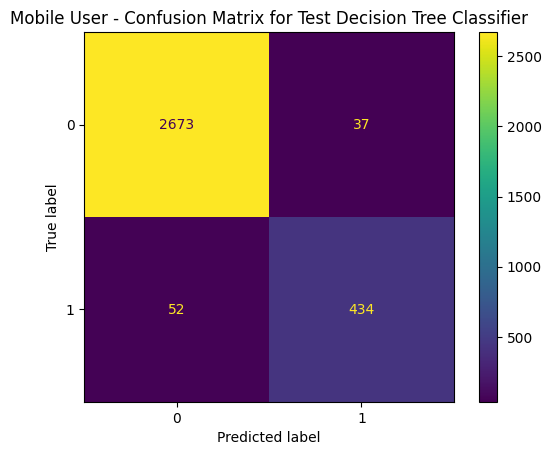

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay

dt_mb_train_cm=confusion_matrix(y_train_mb, y_dt_train_mb_predicted)
dt_mb_test_cm=confusion_matrix(y_test_mb, y_dt_test_mb_predicted)

ConfusionMatrixDisplay(confusion_matrix=dt_mb_train_cm, display_labels=mb_dt_model.classes_).plot()
plt.grid(False)
plt.title('Mobile User - Confusion Matrix for Trained Decision Tree Classifier')
plt.show();

ConfusionMatrixDisplay(confusion_matrix=dt_mb_test_cm, display_labels=mb_dt_model.classes_).plot()
plt.grid(False)
plt.title('Mobile User - Confusion Matrix for Test Decision Tree Classifier')
plt.show();

AUC for train data for Logistic Regression: 1.000
AUC for test data for Logistic Regression: 0.940


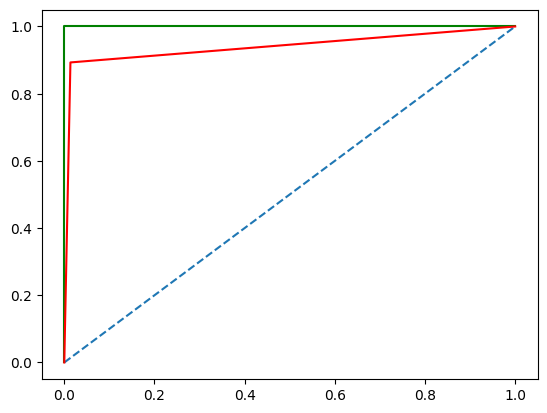

In [80]:
# Code to plot ROC AUC Curve for Classification Models

# predict probabilities
dt_mb_train_predicted = mb_dt_model.predict_proba(X_train_mb)
# keep probabilities for the positive outcome only
dt_mb_train_prob_predicted = dt_mb_train_predicted[:,1]
# calculate AUC
dt_mb_auc_train = roc_auc_score(y_train_mb, dt_mb_train_prob_predicted)
print('AUC for train data for Logistic Regression: %.3f' % dt_mb_auc_train)
#
# predict probabilities
dt_mb_test_predicted = mb_dt_model.predict_proba(X_test_mb)
# keep probabilities for the positive outcome only
dt_mb_test_prob_predicted = dt_mb_test_predicted[:,1]
# calculate AUC
dt_mb_auc_test = roc_auc_score(y_test_mb, dt_mb_test_prob_predicted)
print('AUC for test data for Logistic Regression: %.3f' % dt_mb_auc_test)

# calculate roc curve
dt_mb_train_fpr, dt_mb_train_tpr, dt_mb_train_thresholds = roc_curve(y_train_mb, dt_mb_train_prob_predicted)
dt_mb_test_fpr, dt_mb_test_tpr, dt_mb_test_thresholds = roc_curve(y_test_mb, dt_mb_test_prob_predicted)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_mb_train_fpr, dt_mb_train_tpr, color='g')
plt.plot(dt_mb_test_fpr, dt_mb_test_tpr, color='r')
plt.show();

### Tuned Decision Tree Classifier for Mobile users

In [81]:
hyper_parameters = {
    'criterion':['gini','entropy','log_loss'],
    'max_depth' : [10,15,20,25,30],  #maximum number of levels allowed in each decision tree
    'min_samples_split' : [1,2,3,6,9,12], # 15,30,35], # minimum sample number to split a node
    'min_samples_leaf' : [1,3,9,12,15] #,18,21,24]
}

mb_dt_model_tuned = DecisionTreeClassifier(random_state=123)

mb_gs_dt_model = GridSearchCV(estimator=mb_dt_model_tuned,
                                   param_grid=hyper_parameters,
                                   cv = 5,
                                   verbose=True,
                                   n_jobs=-1)

mb_gs_dt_model.fit(X_train_mb, y_train_mb)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 3, 9, 12, 15],
                         'min_samples_split': [1, 2, 3, 6, 9, 12]},
             verbose=True)

In [82]:
mb_gs_dt_model.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [83]:
y_gs_dt_train_mb_predicted = mb_gs_dt_model.predict(X_train_mb)
y_gs_dt_test_mb_predicted = mb_gs_dt_model.predict(X_test_mb)

print('Classification Report for Training data for Laptop Users-\n',classification_report(y_train_mb, y_gs_dt_train_mb_predicted))
print('\n\n\nClassification Report for Test data for Laptop Users-\n',classification_report(y_test_mb, y_gs_dt_test_mb_predicted))

Classification Report for Training data for Laptop Users-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6322
           1       1.00      1.00      1.00      1134

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456




Classification Report for Test data for Laptop Users-
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2710
           1       0.93      0.91      0.92       486

    accuracy                           0.98      3196
   macro avg       0.96      0.95      0.95      3196
weighted avg       0.98      0.98      0.98      3196



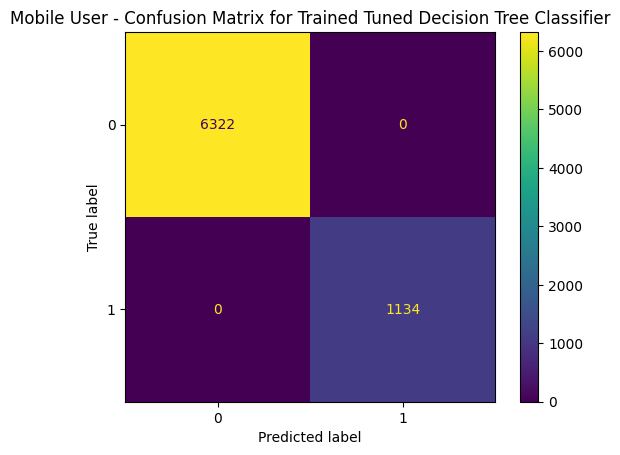

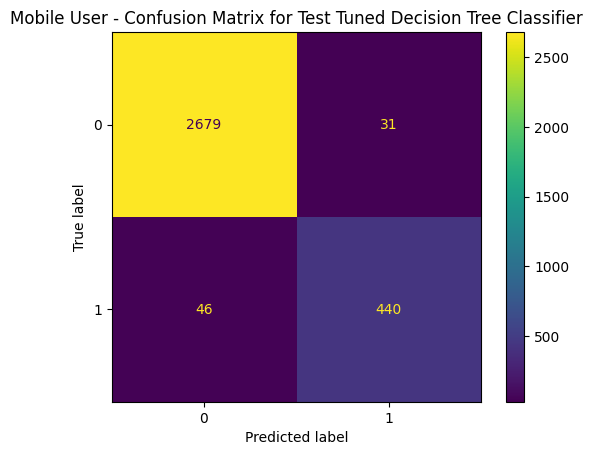

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay

dt_gs_mb_train_cm=confusion_matrix(y_train_mb, y_gs_dt_train_mb_predicted)
dt_gs_mb_test_cm=confusion_matrix(y_test_mb, y_gs_dt_test_mb_predicted)

ConfusionMatrixDisplay(confusion_matrix=dt_gs_mb_train_cm, display_labels=mb_gs_dt_model.classes_).plot()
plt.grid(False)
plt.title('Mobile User - Confusion Matrix for Trained Tuned Decision Tree Classifier')
plt.show();

ConfusionMatrixDisplay(confusion_matrix=dt_gs_mb_test_cm, display_labels=mb_gs_dt_model.classes_).plot()
plt.grid(False)
plt.title('Mobile User - Confusion Matrix for Test Tuned Decision Tree Classifier')
plt.show();

AUC for train data for Logistic Regression: 1.000
AUC for test data for Logistic Regression: 0.947


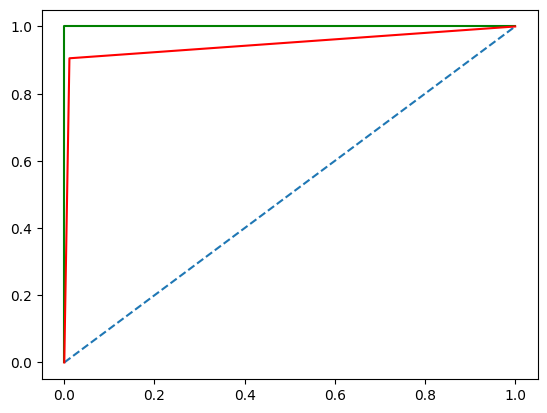

In [85]:
# Code to plot ROC AUC Curve for Classification Models

# predict probabilities
dt_gs_mb_train_predicted = mb_gs_dt_model.predict_proba(X_train_mb)
# keep probabilities for the positive outcome only
dt_gs_mb_train_prob_predicted = dt_gs_mb_train_predicted[:,1]
# calculate AUC
dt_gs_mb_auc_train = roc_auc_score(y_train_mb, dt_gs_mb_train_prob_predicted)
print('AUC for train data for Logistic Regression: %.3f' % dt_gs_mb_auc_train)
#
# predict probabilities
dt_gs_mb_test_predicted = mb_gs_dt_model.predict_proba(X_test_mb)
# keep probabilities for the positive outcome only
dt_gs_mb_test_prob_predicted = dt_gs_mb_test_predicted[:,1]
# calculate AUC
dt_gs_mb_auc_test = roc_auc_score(y_test_mb, dt_gs_mb_test_prob_predicted)
print('AUC for test data for Logistic Regression: %.3f' % dt_gs_mb_auc_test)

# calculate roc curve
dt_gs_mb_train_fpr, dt_gs_mb_train_tpr, dt_gs_mb_train_thresholds = roc_curve(y_train_mb, dt_gs_mb_train_prob_predicted)
dt_gs_mb_test_fpr, dt_gs_mb_test_tpr, dt_gs_mb_test_thresholds = roc_curve(y_test_mb, dt_gs_mb_test_prob_predicted)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_gs_mb_train_fpr, dt_gs_mb_train_tpr, color='g')
plt.plot(dt_gs_mb_test_fpr, dt_gs_mb_test_tpr, color='r')
plt.show();

## III. K-Nearest Neighbhor Classifier

### Scaling the training and test data for KNN Classifier

In [86]:
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
X_train_lp_scaled = scaling.fit_transform(X_train_lp)
X_train_mb_scaled = scaling.fit_transform(X_train_mb)

In [87]:
X_test_lp_scaled = scaling.fit_transform(X_test_lp)
X_test_mb_scaled = scaling.fit_transform(X_test_mb)

### K-Nearest Neighbhor Classifier for Laptop users

In [88]:
from sklearn.neighbors import KNeighborsClassifier

lp_knn_model = KNeighborsClassifier(n_neighbors=3)
lp_knn_model.fit(X_train_lp_scaled, y_train_lp)

KNeighborsClassifier(n_neighbors=3)

In [89]:
y_knn_train_lp_predicted = lp_knn_model.predict(X_train_lp_scaled)
y_knn_test_lp_predicted = lp_knn_model.predict(X_test_lp_scaled)

print('Classification Report for Training data for Laptop Users-\n',classification_report(y_train_lp, y_knn_train_lp_predicted))
print('\n\n\nClassification Report for Test data for Laptop Users-\n',classification_report(y_test_lp, y_knn_test_lp_predicted))

Classification Report for Training data for Laptop Users-
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       582
           1       0.99      0.97      0.98       193

    accuracy                           0.99       775
   macro avg       0.99      0.98      0.99       775
weighted avg       0.99      0.99      0.99       775




Classification Report for Test data for Laptop Users-
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       250
           1       0.88      0.72      0.79        83

    accuracy                           0.91       333
   macro avg       0.90      0.85      0.87       333
weighted avg       0.91      0.91      0.90       333



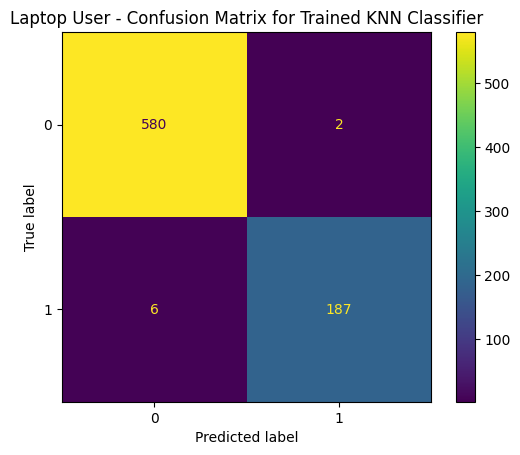

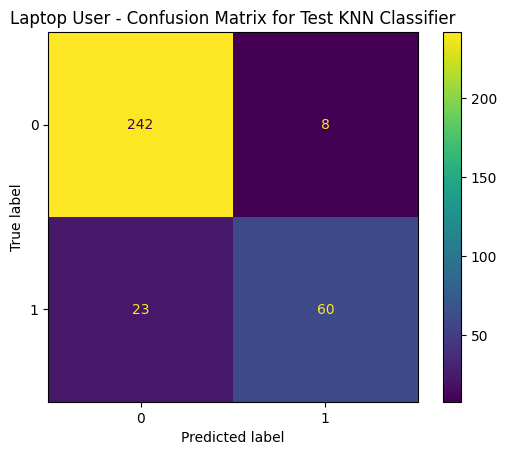

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay

knn_lp_train_cm=confusion_matrix(y_train_lp, y_knn_train_lp_predicted)
knn_lp_test_cm=confusion_matrix(y_test_lp, y_knn_test_lp_predicted)

ConfusionMatrixDisplay(confusion_matrix=knn_lp_train_cm, display_labels=lp_knn_model.classes_).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Trained KNN Classifier')
plt.show();

ConfusionMatrixDisplay(confusion_matrix=knn_lp_test_cm, display_labels=lp_knn_model.classes_).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Test KNN Classifier')
plt.show();

AUC for train data for Logistic Regression: 0.999
AUC for test data for Logistic Regression: 0.954


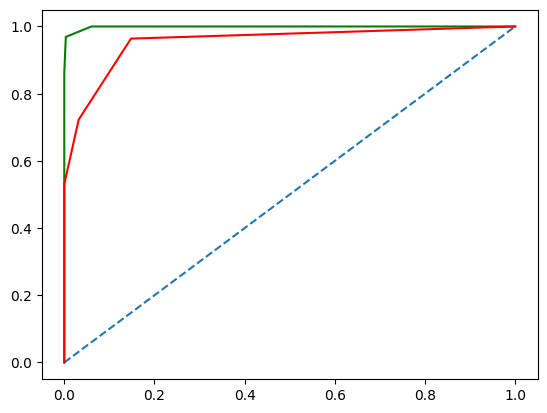

In [91]:
# Code to plot ROC AUC Curve for Classification Models

# predict probabilities
knn_lp_train_predicted = lp_knn_model.predict_proba(X_train_lp_scaled)
# keep probabilities for the positive outcome only
knn_lp_train_prob_predicted = knn_lp_train_predicted[:,1]
# calculate AUC
knn_lp_auc_train = roc_auc_score(y_train_lp, knn_lp_train_prob_predicted)
print('AUC for train data for Logistic Regression: %.3f' % knn_lp_auc_train)
#
# predict probabilities
knn_lp_test_predicted = lp_knn_model.predict_proba(X_test_lp_scaled)
# keep probabilities for the positive outcome only
knn_lp_test_prob_predicted = knn_lp_test_predicted[:,1]
# calculate AUC
knn_lp_auc_test = roc_auc_score(y_test_lp, knn_lp_test_prob_predicted)
print('AUC for test data for Logistic Regression: %.3f' % knn_lp_auc_test)

# calculate roc curve
knn_lp_train_fpr, knn_lp_train_tpr, knn_lp_train_thresholds = roc_curve(y_train_lp, knn_lp_train_prob_predicted)
knn_lp_test_fpr, knn_lp_test_tpr, knn_lp_test_thresholds = roc_curve(y_test_lp, knn_lp_test_prob_predicted)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_lp_train_fpr, knn_lp_train_tpr, color='g')
plt.plot(knn_lp_test_fpr, knn_lp_test_tpr, color='r')
plt.show();

### Tuned K-Nearest Neighbhor Classifier for Laptop users

In [92]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3,5,7,9,11],
    'weights': ['distance','uniform'],
    'metric' : ['minkowski','euclidean','manhattan']
}

knn_tuned = KNeighborsClassifier()

lp_gs_knn_model = GridSearchCV(estimator = knn_tuned,
                      param_grid = param_grid,
                      cv = 5,
                      verbose = 1,
                      return_train_score = True
                      )

lp_gs_knn_model.fit(X_train_lp_scaled, y_train_lp)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['distance', 'uniform']},
             return_train_score=True, verbose=1)

In [93]:
lp_gs_knn_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [94]:
y_gs_knn_train_lp_predicted = lp_gs_knn_model.predict(X_train_lp_scaled)
y_gs_knn_test_lp_predicted = lp_gs_knn_model.predict(X_test_lp_scaled)

print('Classification Report for Training data for Laptop Users-\n',classification_report(y_train_lp, y_gs_knn_train_lp_predicted))
print('\n\n\nClassification Report for Test data for Laptop Users-\n',classification_report(y_test_lp, y_gs_knn_test_lp_predicted))

Classification Report for Training data for Laptop Users-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      1.00      1.00       193

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775




Classification Report for Test data for Laptop Users-
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       250
           1       0.92      0.92      0.92        83

    accuracy                           0.96       333
   macro avg       0.94      0.94      0.94       333
weighted avg       0.96      0.96      0.96       333



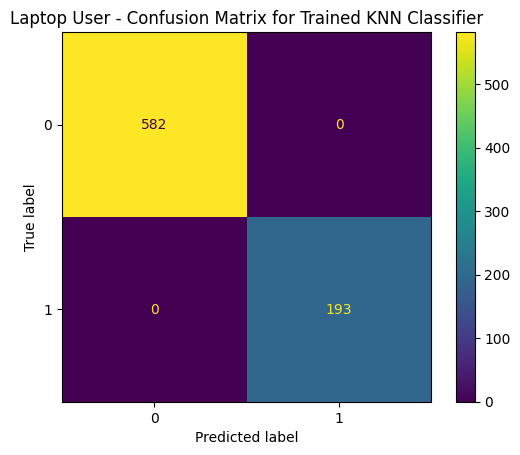

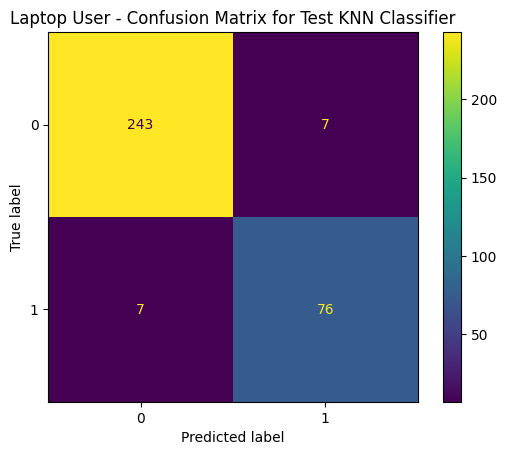

In [95]:
from sklearn.metrics import ConfusionMatrixDisplay

gs_knn_lp_train_cm=confusion_matrix(y_train_lp, y_gs_knn_train_lp_predicted)
gs_knn_lp_test_cm=confusion_matrix(y_test_lp, y_gs_knn_test_lp_predicted)

ConfusionMatrixDisplay(confusion_matrix=gs_knn_lp_train_cm, display_labels=lp_gs_knn_model.classes_).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Trained KNN Classifier')
plt.show();

ConfusionMatrixDisplay(confusion_matrix=gs_knn_lp_test_cm, display_labels=lp_gs_knn_model.classes_).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Test KNN Classifier')
plt.show();

AUC for train data for Logistic Regression: 1.000
AUC for test data for Logistic Regression: 0.995


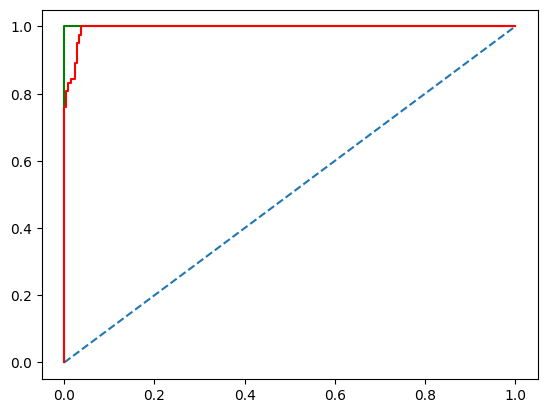

In [96]:
# Code to plot ROC AUC Curve for Classification Models

# predict probabilities
knn_gs_lp_train_predicted = lp_gs_knn_model.predict_proba(X_train_lp_scaled)
# keep probabilities for the positive outcome only
knn_gs_lp_train_prob_predicted = knn_gs_lp_train_predicted[:,1]
# calculate AUC
knn_gs_lp_auc_train = roc_auc_score(y_train_lp, knn_gs_lp_train_prob_predicted)
print('AUC for train data for Logistic Regression: %.3f' % knn_gs_lp_auc_train)
#
# predict probabilities
knn_gs_lp_test_predicted = lp_gs_knn_model.predict_proba(X_test_lp_scaled)
# keep probabilities for the positive outcome only
knn_gs_lp_test_prob_predicted = knn_gs_lp_test_predicted[:,1]
# calculate AUC
knn_gs_lp_auc_test = roc_auc_score(y_test_lp, knn_gs_lp_test_prob_predicted)
print('AUC for test data for Logistic Regression: %.3f' % knn_gs_lp_auc_test)

# calculate roc curve
knn_gs_lp_train_fpr, knn_gs_lp_train_tpr, knn_gs_lp_train_thresholds = roc_curve(y_train_lp, knn_gs_lp_train_prob_predicted)
knn_gs_lp_test_fpr, knn_gs_lp_test_tpr, knn_gs_lp_test_thresholds = roc_curve(y_test_lp, knn_gs_lp_test_prob_predicted)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_gs_lp_train_fpr, knn_gs_lp_train_tpr, color='g')
plt.plot(knn_gs_lp_test_fpr, knn_gs_lp_test_tpr, color='r')
plt.show();

### K-Nearest Neighbhor Classifier for Mobile users

In [97]:
from sklearn.neighbors import KNeighborsClassifier

mb_knn_model = KNeighborsClassifier(n_neighbors=3)
mb_knn_model.fit(X_train_mb_scaled, y_train_mb)

KNeighborsClassifier(n_neighbors=3)

In [98]:
y_knn_train_mb_predicted = mb_knn_model.predict(X_train_mb_scaled)
y_knn_test_mb_predicted = mb_knn_model.predict(X_test_mb_scaled)

print('Classification Report for Training data for Mobile Users-\n',classification_report(y_train_mb, y_knn_train_mb_predicted))
print('\n\n\nClassification Report for Test data for Mobile Users-\n',classification_report(y_test_mb, y_knn_test_mb_predicted))

Classification Report for Training data for Mobile Users-
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      6322
           1       0.98      0.96      0.97      1134

    accuracy                           0.99      7456
   macro avg       0.99      0.98      0.98      7456
weighted avg       0.99      0.99      0.99      7456




Classification Report for Test data for Mobile Users-
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2710
           1       0.92      0.84      0.88       486

    accuracy                           0.96      3196
   macro avg       0.95      0.91      0.93      3196
weighted avg       0.96      0.96      0.96      3196



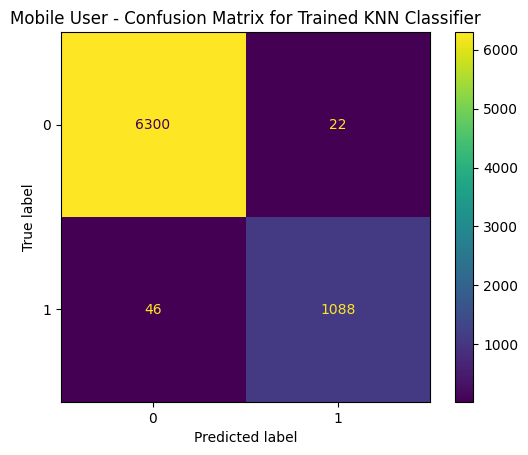

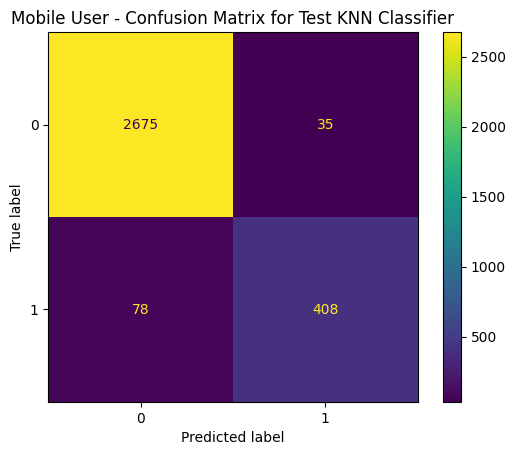

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay

knn_mb_train_cm=confusion_matrix(y_train_mb, y_knn_train_mb_predicted)
knn_mb_test_cm=confusion_matrix(y_test_mb, y_knn_test_mb_predicted)

ConfusionMatrixDisplay(confusion_matrix=knn_mb_train_cm, display_labels=mb_knn_model.classes_).plot()
plt.grid(False)
plt.title('Mobile User - Confusion Matrix for Trained KNN Classifier')
plt.show();

ConfusionMatrixDisplay(confusion_matrix=knn_mb_test_cm, display_labels=mb_knn_model.classes_).plot()
plt.grid(False)
plt.title('Mobile User - Confusion Matrix for Test KNN Classifier')
plt.show();

AUC for train data for Logistic Regression: 0.999
AUC for test data for Logistic Regression: 0.977


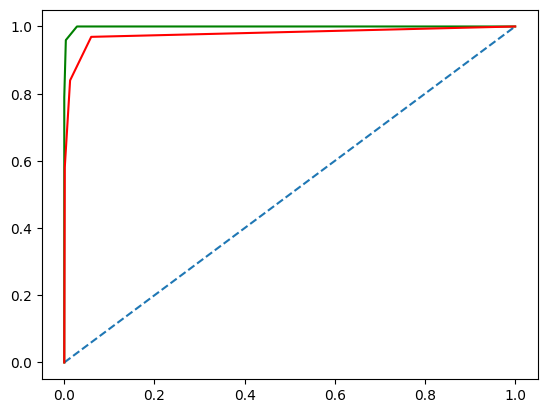

In [100]:
# Code to plot ROC AUC Curve for Classification Models

# predict probabilities
knn_mb_train_predicted = mb_knn_model.predict_proba(X_train_mb_scaled)
# keep probabilities for the positive outcome only
knn_mb_train_prob_predicted = knn_mb_train_predicted[:,1]
# calculate AUC
knn_mb_auc_train = roc_auc_score(y_train_mb, knn_mb_train_prob_predicted)
print('AUC for train data for Logistic Regression: %.3f' % knn_mb_auc_train)
#
# predict probabilities
knn_mb_test_predicted = mb_knn_model.predict_proba(X_test_mb_scaled)
# keep probabilities for the positive outcome only
knn_mb_test_prob_predicted = knn_mb_test_predicted[:,1]
# calculate AUC
knn_mb_auc_test = roc_auc_score(y_test_mb, knn_mb_test_prob_predicted)
print('AUC for test data for Logistic Regression: %.3f' % knn_mb_auc_test)

# calculate roc curve
knn_mb_train_fpr, knn_mb_train_tpr, knn_mb_train_thresholds = roc_curve(y_train_mb, knn_mb_train_prob_predicted)
knn_mb_test_fpr, knn_mb_test_tpr, knn_mb_test_thresholds = roc_curve(y_test_mb, knn_mb_test_prob_predicted)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_mb_train_fpr, knn_mb_train_tpr, color='g')
plt.plot(knn_mb_test_fpr, knn_mb_test_tpr, color='r')
plt.show();

### Tuned K-Nearest Neighbhor Classifier for Laptop users

In [101]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3,5,7,9,11],
    'weights': ['distance','uniform'],
    'metric' : ['minkowski','euclidean','manhattan']
}

mb_knn_tuned = KNeighborsClassifier()

mb_gs_knn_model = GridSearchCV(estimator = mb_knn_tuned,
                      param_grid = param_grid,
                      cv = 5,
                      verbose = 1,
                      return_train_score = True
                      )

mb_gs_knn_model.fit(X_train_mb_scaled, y_train_mb)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['distance', 'uniform']},
             return_train_score=True, verbose=1)

In [102]:
mb_gs_knn_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [103]:
y_gs_knn_train_mb_predicted = mb_gs_knn_model.predict(X_train_mb_scaled)
y_gs_knn_test_mb_predicted = mb_gs_knn_model.predict(X_test_mb_scaled)

print('Classification Report for Training data for Mobile Users-\n',classification_report(y_train_mb, y_gs_knn_train_mb_predicted))
print('\n\n\nClassification Report for Test data for Mobile Users-\n',classification_report(y_test_mb, y_gs_knn_test_mb_predicted))

Classification Report for Training data for Laptop Users-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6322
           1       1.00      1.00      1.00      1134

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456




Classification Report for Test data for Laptop Users-
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2710
           1       0.98      0.96      0.97       486

    accuracy                           0.99      3196
   macro avg       0.98      0.98      0.98      3196
weighted avg       0.99      0.99      0.99      3196



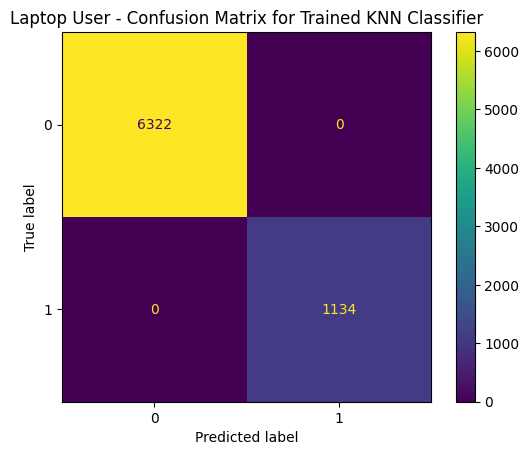

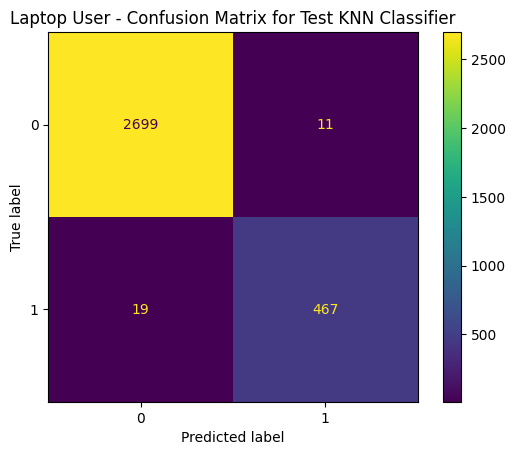

In [104]:
from sklearn.metrics import ConfusionMatrixDisplay

gs_knn_mb_train_cm=confusion_matrix(y_train_mb, y_gs_knn_train_mb_predicted)
gs_knn_mb_test_cm=confusion_matrix(y_test_mb, y_gs_knn_test_mb_predicted)

ConfusionMatrixDisplay(confusion_matrix=gs_knn_mb_train_cm, display_labels=mb_gs_knn_model.classes_).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Trained KNN Classifier')
plt.show();

ConfusionMatrixDisplay(confusion_matrix=gs_knn_mb_test_cm, display_labels=mb_gs_knn_model.classes_).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Test KNN Classifier')
plt.show();

AUC for train data for Logistic Regression: 1.000
AUC for test data for Logistic Regression: 0.994


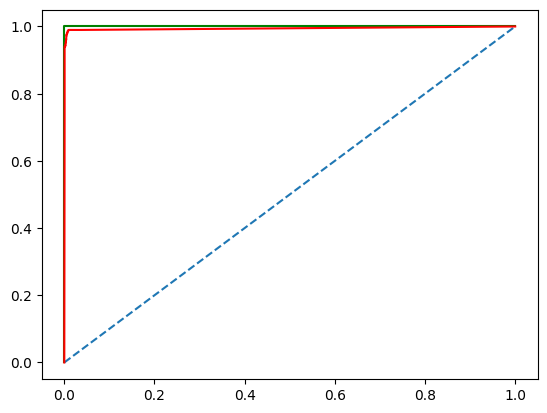

In [105]:
# Code to plot ROC AUC Curve for Classification Models

# predict probabilities
knn_gs_mb_train_predicted = mb_gs_knn_model.predict_proba(X_train_mb_scaled)
# keep probabilities for the positive outcome only
knn_gs_mb_train_prob_predicted = knn_gs_mb_train_predicted[:,1]
# calculate AUC
knn_gs_mb_auc_train = roc_auc_score(y_train_mb, knn_gs_mb_train_prob_predicted)
print('AUC for train data for Logistic Regression: %.3f' % knn_gs_mb_auc_train)
#
# predict probabilities
knn_gs_mb_test_predicted = mb_gs_knn_model.predict_proba(X_test_mb_scaled)
# keep probabilities for the positive outcome only
knn_gs_mb_test_prob_predicted = knn_gs_mb_test_predicted[:,1]
# calculate AUC
knn_gs_mb_auc_test = roc_auc_score(y_test_mb, knn_gs_mb_test_prob_predicted)
print('AUC for test data for Logistic Regression: %.3f' % knn_gs_mb_auc_test)

# calculate roc curve
knn_gs_mb_train_fpr, knn_gs_mb_train_tpr, knn_gs_mb_train_thresholds = roc_curve(y_train_mb, knn_gs_mb_train_prob_predicted)
knn_gs_mb_test_fpr, knn_gs_mb_test_tpr, knn_gs_mb_test_thresholds = roc_curve(y_test_mb, knn_gs_mb_test_prob_predicted)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_gs_mb_train_fpr, knn_gs_mb_train_tpr, color='g')
plt.plot(knn_gs_mb_test_fpr, knn_gs_mb_test_tpr, color='r')
plt.show();

## IV. Random Forest Classifier

### Random Forest Classifier for Laptop users

In [106]:
from sklearn.ensemble import RandomForestClassifier

lp_rf_model = RandomForestClassifier(random_state=123)
lp_rf_model.fit(X_train_lp, y_train_lp)

RandomForestClassifier(random_state=123)

In [107]:
y_rf_train_lp_predicted = lp_rf_model.predict(X_train_lp)
y_rf_test_lp_predicted = lp_rf_model.predict(X_test_lp)


print('Classification Report for Training data for Laptop Users-\n',classification_report(y_train_lp, y_rf_train_lp_predicted))
print('\n\n\nClassification Report for Test data for Laptop Users-\n',classification_report(y_test_lp, y_rf_test_lp_predicted))

Classification Report for Training data for Laptop Users-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      1.00      1.00       193

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775




Classification Report for Test data for Laptop Users-
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       250
           1       1.00      0.81      0.89        83

    accuracy                           0.95       333
   macro avg       0.97      0.90      0.93       333
weighted avg       0.95      0.95      0.95       333



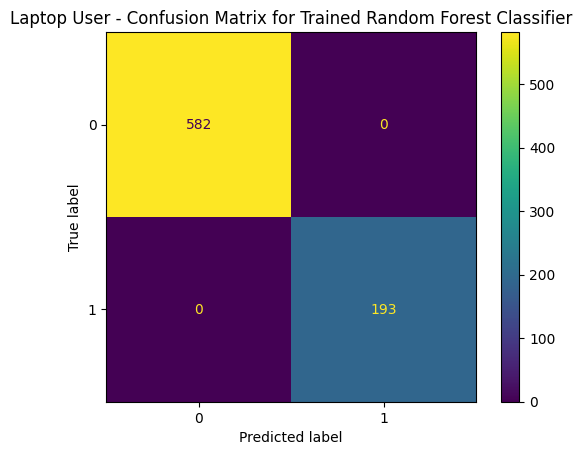

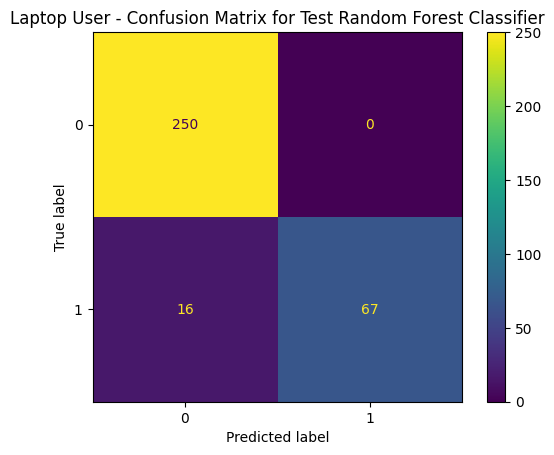

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay

rf_lp_train_cm=confusion_matrix(y_train_lp, y_rf_train_lp_predicted)
rf_lp_test_cm=confusion_matrix(y_test_lp, y_rf_test_lp_predicted)

ConfusionMatrixDisplay(confusion_matrix=rf_lp_train_cm, display_labels=lp_rf_model.classes_).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Trained Random Forest Classifier')
plt.show();

ConfusionMatrixDisplay(confusion_matrix=rf_lp_test_cm, display_labels=lp_rf_model.classes_).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Test Random Forest Classifier')
plt.show();

AUC for train data for Logistic Regression: 1.000
AUC for test data for Logistic Regression: 0.996


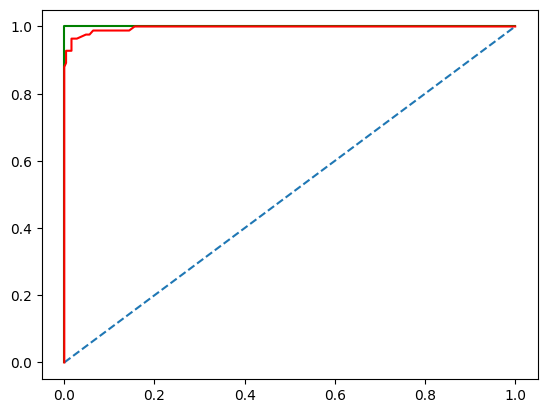

In [109]:
# Code to plot ROC AUC Curve for Classification Models

# predict probabilities
rf_lp_train_predicted = lp_rf_model.predict_proba(X_train_lp)
# keep probabilities for the positive outcome only
rf_lp_train_prob_predicted = rf_lp_train_predicted[:,1]
# calculate AUC
rf_lp_auc_train = roc_auc_score(y_train_lp, rf_lp_train_prob_predicted)
print('AUC for train data for Logistic Regression: %.3f' % rf_lp_auc_train)
#
# predict probabilities
rf_lp_test_predicted = lp_rf_model.predict_proba(X_test_lp)
# keep probabilities for the positive outcome only
rf_lp_test_prob_predicted = rf_lp_test_predicted[:,1]
# calculate AUC
rf_lp_auc_test = roc_auc_score(y_test_lp, rf_lp_test_prob_predicted)
print('AUC for test data for Logistic Regression: %.3f' % rf_lp_auc_test)

# calculate roc curve
rf_lp_train_fpr, rf_lp_train_tpr, rf_lp_train_thresholds = roc_curve(y_train_lp, rf_lp_train_prob_predicted)
rf_lp_test_fpr, rf_lp_test_tpr, rf_lp_test_thresholds = roc_curve(y_test_lp, rf_lp_test_prob_predicted)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_lp_train_fpr, rf_lp_train_tpr, color='g')
plt.plot(rf_lp_test_fpr, rf_lp_test_tpr, color='r')
plt.show();

### Tuned Random Forest Classifier for Laptop users

In [110]:
hyper_parameters = {
            'max_features': [7,9,12,15],
            'n_estimators': [40, 50, 60, 70], # number of trees in the random forest
            'max_depth' : [7,10,15,18], # maximum number of levels allowed in each decision tree
            'min_samples_split' : [1,2,3,6,9], #,15,20,25,30, # minimum sample number to split a node
            'min_samples_leaf' : [1,2,3,6,9] # minimum sample number that can be stored in a leaf node
}

lp_rf_model_tuned = RandomForestClassifier(random_state=123)

lp_gs_rf_model = GridSearchCV(estimator=lp_rf_model_tuned,
                              param_grid=hyper_parameters,
                              cv = 5,
                              verbose=True,
                              n_jobs=-1)

lp_gs_rf_model.fit(X_train_lp, y_train_lp)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [7, 10, 15, 18],
                         'max_features': [7, 9, 12, 15],
                         'min_samples_leaf': [1, 2, 3, 6, 9],
                         'min_samples_split': [1, 2, 3, 6, 9],
                         'n_estimators': [40, 50, 60, 70]},
             verbose=True)

In [111]:
lp_gs_rf_model.best_params_

{'max_depth': 15,
 'max_features': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 40}

In [112]:
y_gs_rf_train_lp_predicted = lp_gs_rf_model.predict(X_train_lp)
y_gs_rf_test_lp_predicted = lp_gs_rf_model.predict(X_test_lp)

print('Classification Report for Training data for Laptop Users-\n',classification_report(y_train_lp, y_gs_rf_train_lp_predicted))
print('\n\n\nClassification Report for Test data for Laptop Users-\n',classification_report(y_test_lp, y_gs_rf_test_lp_predicted))

Classification Report for Training data for Laptop Users-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      0.99      1.00       193

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775




Classification Report for Test data for Laptop Users-
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       250
           1       1.00      0.87      0.93        83

    accuracy                           0.97       333
   macro avg       0.98      0.93      0.95       333
weighted avg       0.97      0.97      0.97       333



In [113]:
y_gs_rf_train_lp_prob_predicted = lp_gs_rf_model.predict_proba(X_train_lp)
y_gs_rf_test_lp_prob_predicted = lp_gs_rf_model.predict_proba(X_test_lp)

y_gs_rf_train_lp_predicted = [1 if i >= 0.29 else 0 for i in y_gs_rf_train_lp_prob_predicted[:,1]]
y_gs_rf_test_lp_predicted =  [1 if i >= 0.29 else 0 for i in y_gs_rf_test_lp_prob_predicted[:,1]]

print('Classification Report for Training data for Laptop Users-\n',classification_report(y_train_lp, y_gs_rf_train_lp_predicted))
print('\n\n\nClassification Report for Test data for Laptop Users-\n',classification_report(y_test_lp, y_gs_rf_test_lp_predicted))

Classification Report for Training data for Laptop Users-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      1.00      1.00       193

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775




Classification Report for Test data for Laptop Users-
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       250
           1       0.94      0.95      0.95        83

    accuracy                           0.97       333
   macro avg       0.96      0.97      0.96       333
weighted avg       0.97      0.97      0.97       333



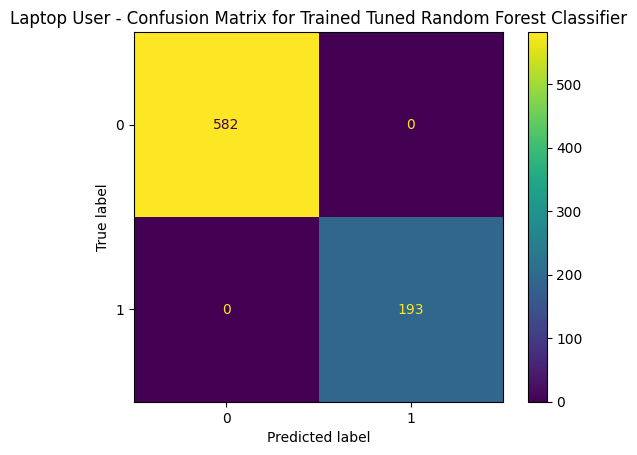

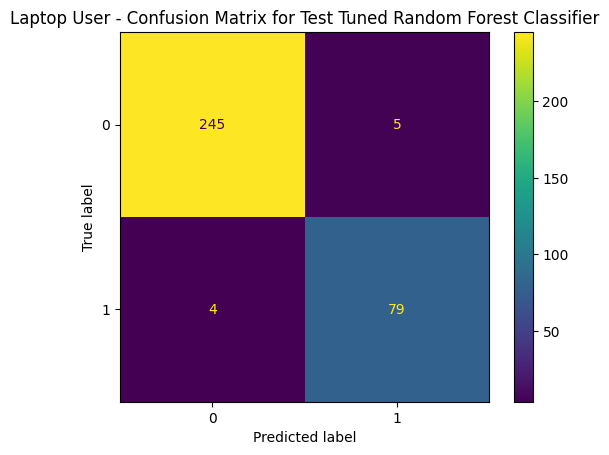

In [114]:
from sklearn.metrics import ConfusionMatrixDisplay

rf_gs_lp_train_cm=confusion_matrix(y_train_lp, y_gs_rf_train_lp_predicted)
rf_gs_lp_test_cm=confusion_matrix(y_test_lp, y_gs_rf_test_lp_predicted)

ConfusionMatrixDisplay(confusion_matrix=rf_gs_lp_train_cm, display_labels=lp_gs_rf_model.classes_).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Trained Tuned Random Forest Classifier')
plt.show();

ConfusionMatrixDisplay(confusion_matrix=rf_gs_lp_test_cm, display_labels=lp_gs_rf_model.classes_).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Test Tuned Random Forest Classifier')
plt.show();

AUC for train data for Logistic Regression: 1.000
AUC for test data for Logistic Regression: 0.993


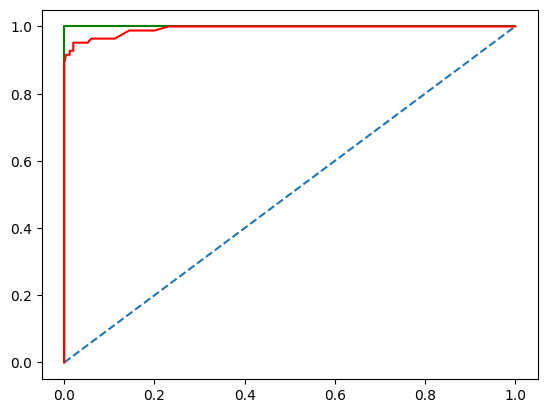

In [115]:
# Code to plot ROC AUC Curve for Classification Models

# predict probabilities
rf_gs_lp_train_predicted = lp_gs_rf_model.predict_proba(X_train_lp)
# keep probabilities for the positive outcome only
rf_gs_lp_train_prob_predicted = rf_gs_lp_train_predicted[:,1]
# calculate AUC
rf_gs_lp_auc_train = roc_auc_score(y_train_lp, rf_gs_lp_train_prob_predicted)
print('AUC for train data for Logistic Regression: %.3f' % rf_gs_lp_auc_train)
#
# predict probabilities
rf_gs_lp_test_predicted = lp_gs_rf_model.predict_proba(X_test_lp)
# keep probabilities for the positive outcome only
rf_gs_lp_test_prob_predicted = rf_gs_lp_test_predicted[:,1]
# calculate AUC
rf_gs_lp_auc_test = roc_auc_score(y_test_lp, rf_gs_lp_test_prob_predicted)
print('AUC for test data for Logistic Regression: %.3f' % rf_gs_lp_auc_test)

# calculate roc curve
rf_gs_lp_train_fpr, rf_gs_lp_train_tpr, rf_gs_lp_train_thresholds = roc_curve(y_train_lp, rf_gs_lp_train_prob_predicted)
rf_gs_lp_test_fpr, rf_gs_lp_test_tpr, rf_gs_lp_test_thresholds = roc_curve(y_test_lp, rf_gs_lp_test_prob_predicted)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_gs_lp_train_fpr, rf_gs_lp_train_tpr, color='g')
plt.plot(rf_gs_lp_test_fpr, rf_gs_lp_test_tpr, color='r')
plt.show();

### Random Forest Classifier for Mobile users

In [116]:
from sklearn.ensemble import RandomForestClassifier

mb_rf_model = RandomForestClassifier(random_state=123)
mb_rf_model.fit(X_train_mb, y_train_mb)

RandomForestClassifier(random_state=123)

In [117]:
y_rf_train_mb_predicted = mb_rf_model.predict(X_train_mb)
y_rf_test_mb_predicted = mb_rf_model.predict(X_test_mb)


print('Classification Report for Training data for Mobile Users-\n',classification_report(y_train_mb, y_rf_train_mb_predicted))
print('\n\n\nClassification Report for Test data for Mobile Users-\n',classification_report(y_test_mb, y_rf_test_mb_predicted))

Classification Report for Training data for Mobile Users-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6322
           1       1.00      1.00      1.00      1134

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456




Classification Report for Test data for Mobile Users-
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2710
           1       1.00      0.86      0.93       486

    accuracy                           0.98      3196
   macro avg       0.99      0.93      0.96      3196
weighted avg       0.98      0.98      0.98      3196



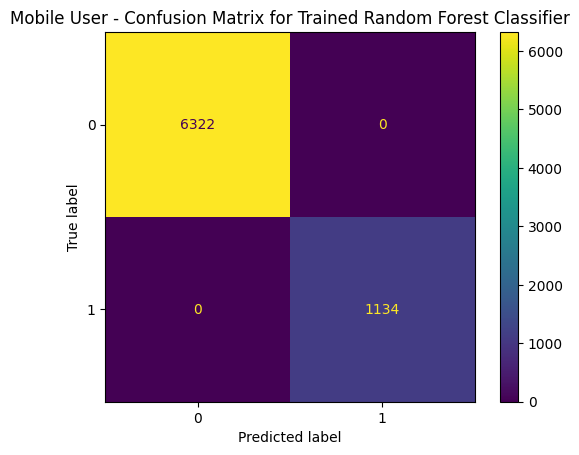

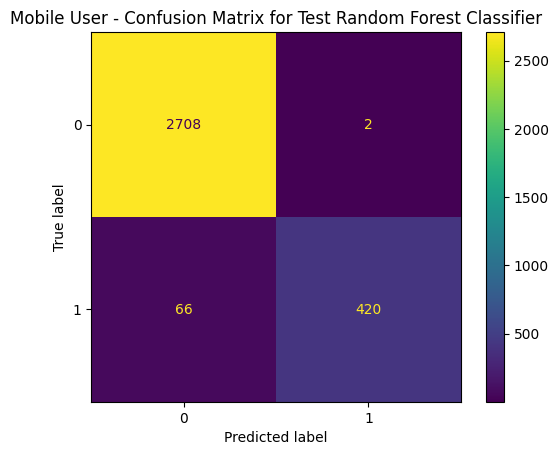

In [118]:
from sklearn.metrics import ConfusionMatrixDisplay

rf_mb_train_cm=confusion_matrix(y_train_mb, y_rf_train_mb_predicted)
rf_mb_test_cm=confusion_matrix(y_test_mb, y_rf_test_mb_predicted)

ConfusionMatrixDisplay(confusion_matrix=rf_mb_train_cm, display_labels=mb_rf_model.classes_).plot()
plt.grid(False)
plt.title('Mobile User - Confusion Matrix for Trained Random Forest Classifier')
plt.show();

ConfusionMatrixDisplay(confusion_matrix=rf_mb_test_cm, display_labels=mb_rf_model.classes_).plot()
plt.grid(False)
plt.title('Mobile User - Confusion Matrix for Test Random Forest Classifier')
plt.show();

AUC for train data for Logistic Regression: 1.000
AUC for test data for Logistic Regression: 0.999


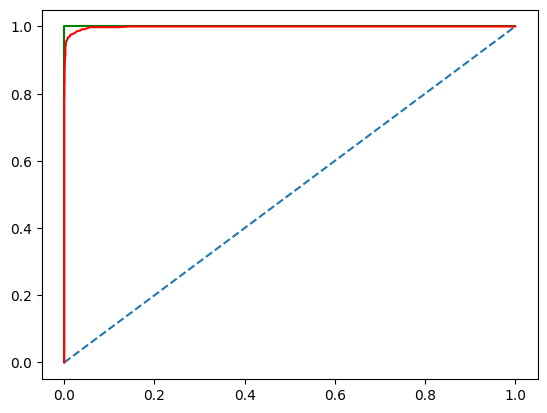

In [119]:
# Code to plot ROC AUC Curve for Classification Models

# predict probabilities
rf_mb_train_predicted = mb_rf_model.predict_proba(X_train_mb)
# keep probabilities for the positive outcome only
rf_mb_train_prob_predicted = rf_mb_train_predicted[:,1]
# calculate AUC
rf_mb_auc_train = roc_auc_score(y_train_mb, rf_mb_train_prob_predicted)
print('AUC for train data for Logistic Regression: %.3f' % rf_mb_auc_train)
#
# predict probabilities
rf_mb_test_predicted = mb_rf_model.predict_proba(X_test_mb)
# keep probabilities for the positive outcome only
rf_mb_test_prob_predicted = rf_mb_test_predicted[:,1]
# calculate AUC
rf_mb_auc_test = roc_auc_score(y_test_mb, rf_mb_test_prob_predicted)
print('AUC for test data for Logistic Regression: %.3f' % rf_mb_auc_test)

# calculate roc curve
rf_mb_train_fpr, rf_mb_train_tpr, rf_mb_train_thresholds = roc_curve(y_train_mb, rf_mb_train_prob_predicted)
rf_mb_test_fpr, rf_mb_test_tpr, rf_mb_test_thresholds = roc_curve(y_test_mb, rf_mb_test_prob_predicted)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_mb_train_fpr, rf_mb_train_tpr, color='g')
plt.plot(rf_mb_test_fpr, rf_mb_test_tpr, color='r')
plt.show();

### Tuned Random Forest Classifier for Mobile users

In [120]:
hyper_parameters = {
            'max_features': [8,9,10,11,12],
            'n_estimators': [50, 60, 70, 80], # number of trees in the random forest
            'max_depth' : [12,15,18,21], # maximum number of levels allowed in each decision tree
            'min_samples_split' : [1,2,3,6,9], #,15,20,25,30, # minimum sample number to split a node
            'min_samples_leaf' : [1,2,3,6,9] # minimum sample number that can be stored in a leaf node
}


mb_rf_model_tuned = RandomForestClassifier(random_state=123)

mb_gs_rf_model = GridSearchCV(estimator=mb_rf_model_tuned,
                                   param_grid=hyper_parameters,
                                   cv = 5,
                                   verbose=True,
                                   n_jobs=-1)

mb_gs_rf_model.fit(X_train_mb, y_train_mb)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [12, 15, 18, 21],
                         'max_features': [8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2, 3, 6, 9],
                         'min_samples_split': [1, 2, 3, 6, 9],
                         'n_estimators': [50, 60, 70, 80]},
             verbose=True)

In [121]:
mb_gs_rf_model.best_params_

{'max_depth': 21,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 70}

In [122]:
y_gs_rf_train_mb_predicted = mb_gs_rf_model.predict(X_train_mb)
y_gs_rf_test_mb_predicted = mb_gs_rf_model.predict(X_test_mb)

print('Classification Report for Training data for Laptop Users-\n',classification_report(y_train_mb, y_gs_rf_train_mb_predicted))
print('\n\n\nClassification Report for Test data for Laptop Users-\n',classification_report(y_test_mb, y_gs_rf_test_mb_predicted))

Classification Report for Training data for Laptop Users-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6322
           1       1.00      1.00      1.00      1134

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456




Classification Report for Test data for Laptop Users-
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2710
           1       0.99      0.90      0.94       486

    accuracy                           0.98      3196
   macro avg       0.99      0.95      0.97      3196
weighted avg       0.98      0.98      0.98      3196



In [123]:
y_gs_rf_train_mb_prob_predicted = mb_gs_rf_model.predict_proba(X_train_mb)
y_gs_rf_test_mb_prob_predicted = mb_gs_rf_model.predict_proba(X_test_mb)

y_gs_rf_train_mb_predicted = [1 if i >= 0.29 else 0 for i in y_gs_rf_train_mb_prob_predicted[:,1]]
y_gs_rf_test_mb_predicted =  [1 if i >= 0.29 else 0 for i in y_gs_rf_test_mb_prob_predicted[:,1]]

print('Classification Report for Training data for Laptop Users-\n',classification_report(y_train_mb, y_gs_rf_train_mb_predicted))
print('\n\n\nClassification Report for Test data for Laptop Users-\n',classification_report(y_test_mb, y_gs_rf_test_mb_predicted))

Classification Report for Training data for Laptop Users-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6322
           1       1.00      1.00      1.00      1134

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456




Classification Report for Test data for Laptop Users-
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2710
           1       0.93      0.97      0.95       486

    accuracy                           0.98      3196
   macro avg       0.96      0.98      0.97      3196
weighted avg       0.98      0.98      0.98      3196



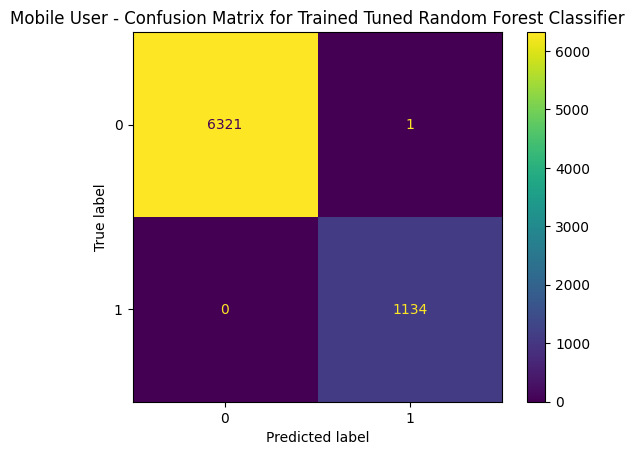

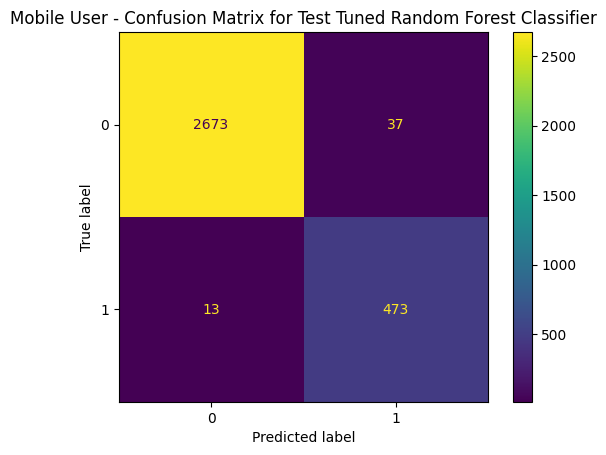

In [124]:
from sklearn.metrics import ConfusionMatrixDisplay

rf_gs_mb_train_cm=confusion_matrix(y_train_mb, y_gs_rf_train_mb_predicted)
rf_gs_mb_test_cm=confusion_matrix(y_test_mb, y_gs_rf_test_mb_predicted)

ConfusionMatrixDisplay(confusion_matrix=rf_gs_mb_train_cm, display_labels=mb_gs_rf_model.classes_).plot()
plt.grid(False)
plt.title('Mobile User - Confusion Matrix for Trained Tuned Random Forest Classifier')
plt.show();

ConfusionMatrixDisplay(confusion_matrix=rf_gs_mb_test_cm, display_labels=mb_gs_rf_model.classes_).plot()
plt.grid(False)
plt.title('Mobile User - Confusion Matrix for Test Tuned Random Forest Classifier')
plt.show();

AUC for train data for Logistic Regression: 1.000
AUC for test data for Logistic Regression: 0.998


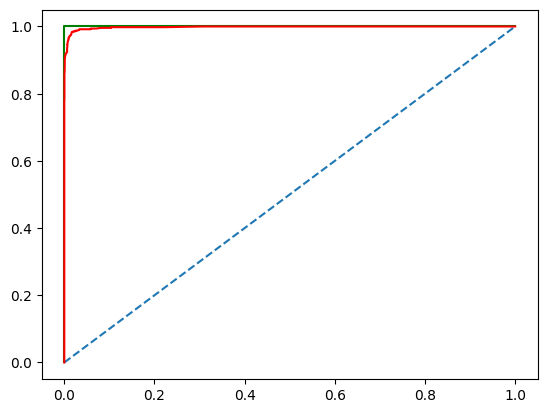

In [125]:
# Code to plot ROC AUC Curve for Classification Models

# predict probabilities
rf_gs_mb_train_predicted = mb_gs_rf_model.predict_proba(X_train_mb)
# keep probabilities for the positive outcome only
rf_gs_mb_train_prob_predicted = rf_gs_mb_train_predicted[:,1]
# calculate AUC
rf_gs_mb_auc_train = roc_auc_score(y_train_mb, rf_gs_mb_train_prob_predicted)
print('AUC for train data for Logistic Regression: %.3f' % rf_gs_mb_auc_train)
#
# predict probabilities
rf_gs_mb_test_predicted = mb_gs_rf_model.predict_proba(X_test_mb)
# keep probabilities for the positive outcome only
rf_gs_mb_test_prob_predicted = rf_gs_mb_test_predicted[:,1]
# calculate AUC
rf_gs_mb_auc_test = roc_auc_score(y_test_mb, rf_gs_mb_test_prob_predicted)
print('AUC for test data for Logistic Regression: %.3f' % rf_gs_mb_auc_test)

# calculate roc curve
rf_gs_mb_train_fpr, rf_gs_mb_train_tpr, rf_gs_mb_train_thresholds = roc_curve(y_train_mb, rf_gs_mb_train_prob_predicted)
rf_gs_mb_test_fpr, rf_gs_mb_test_tpr, rf_gs_mb_test_thresholds = roc_curve(y_test_mb, rf_gs_mb_test_prob_predicted)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_gs_mb_train_fpr, rf_gs_mb_train_tpr, color='g')
plt.plot(rf_gs_mb_test_fpr, rf_gs_mb_test_tpr, color='r')
plt.show();

## V. Extreme Gradient Boosting Classifier

### Extreme Gradient Boosting Classifier for Laptop users

In [126]:
from xgboost import XGBClassifier

lp_xgb_model = XGBClassifier(random_state=123)
lp_xgb_model.fit(X_train_lp, y_train_lp)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [127]:
# y_xgb_train_lp_predicted = lp_xgb_model.predict(X_train_lp)
# y_xgb_test_lp_predicted = lp_xgb_model.predict(X_test_lp)

y_xgb_train_lp_prob_predicted = lp_xgb_model.predict_proba(X_train_lp)
y_xgb_test_lp_prob_predicted = lp_xgb_model.predict_proba(X_test_lp)

y_xgb_train_lp_predicted = [1 if i >= 0.29 else 0 for i in y_xgb_train_lp_prob_predicted[:,1]]
y_xgb_test_lp_predicted =  [1 if i >= 0.29 else 0 for i in y_xgb_test_lp_prob_predicted[:,1]]

print('Classification Report for Training data for Mobile Users-\n',classification_report(y_train_lp, y_xgb_train_lp_predicted))
print('\n\n\nClassification Report for Test data for Mobile Users-\n',classification_report(y_test_lp, y_xgb_test_lp_predicted))

Classification Report for Training data for Mobile Users-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      1.00      1.00       193

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775




Classification Report for Test data for Mobile Users-
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       250
           1       0.94      0.95      0.95        83

    accuracy                           0.97       333
   macro avg       0.96      0.97      0.96       333
weighted avg       0.97      0.97      0.97       333



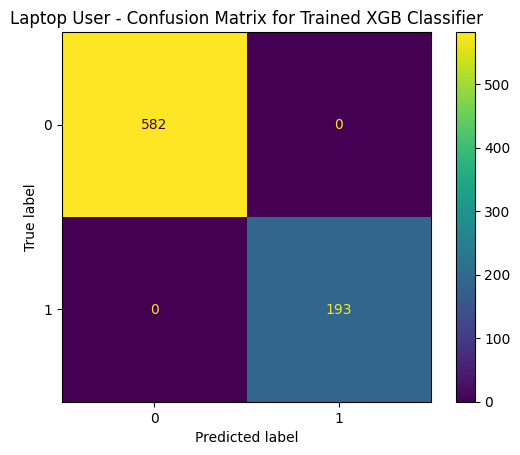

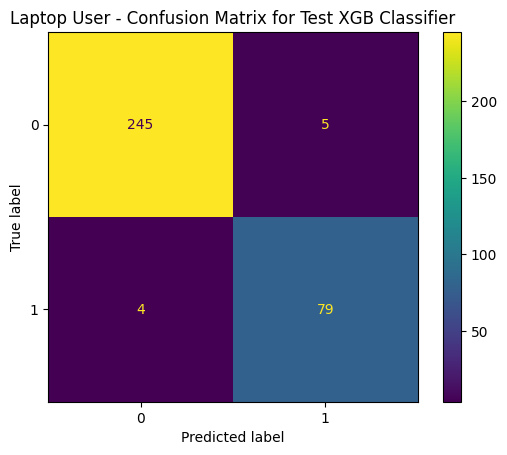

In [128]:
from sklearn.metrics import ConfusionMatrixDisplay

xgb_lp_train_cm=confusion_matrix(y_train_lp, y_xgb_train_lp_predicted)
xgb_lp_test_cm=confusion_matrix(y_test_lp, y_xgb_test_lp_predicted)

ConfusionMatrixDisplay(confusion_matrix=xgb_lp_train_cm, display_labels=lp_xgb_model.classes_).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Trained XGB Classifier')
plt.show();

ConfusionMatrixDisplay(confusion_matrix=xgb_lp_test_cm, display_labels=lp_xgb_model.classes_).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Test XGB Classifier')
plt.show();

AUC for train data for Logistic Regression: 1.000
AUC for test data for Logistic Regression: 0.997


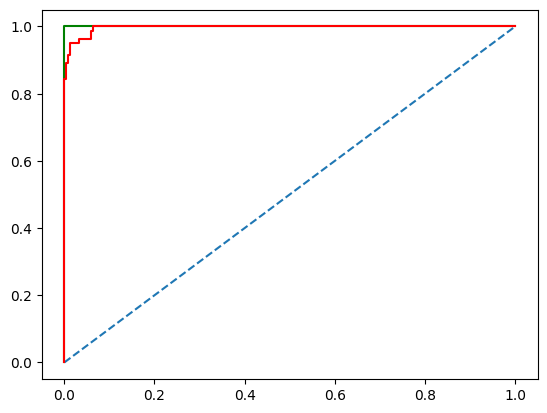

In [129]:
# Code to plot ROC AUC Curve for Classification Models

# predict probabilities
xgb_lp_train_predicted = lp_xgb_model.predict_proba(X_train_lp)
# keep probabilities for the positive outcome only
xgb_lp_train_prob_predicted = xgb_lp_train_predicted[:,1]
# calculate AUC
xgb_lp_auc_train = roc_auc_score(y_train_lp, xgb_lp_train_prob_predicted)
print('AUC for train data for Logistic Regression: %.3f' % xgb_lp_auc_train)
#
# predict probabilities
xgb_lp_test_predicted = lp_xgb_model.predict_proba(X_test_lp)
# keep probabilities for the positive outcome only
xgb_lp_test_prob_predicted = xgb_lp_test_predicted[:,1]
# calculate AUC
xgb_lp_auc_test = roc_auc_score(y_test_lp, xgb_lp_test_prob_predicted)
print('AUC for test data for Logistic Regression: %.3f' % xgb_lp_auc_test)

# calculate roc curve
xgb_lp_train_fpr, xgb_lp_train_tpr, xgb_lp_train_thresholds = roc_curve(y_train_lp, xgb_lp_train_prob_predicted)
xgb_lp_test_fpr, xgb_lp_test_tpr, xgb_lp_test_thresholds = roc_curve(y_test_lp, xgb_lp_test_prob_predicted)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_lp_train_fpr, xgb_lp_train_tpr, color='g')
plt.plot(xgb_lp_test_fpr, xgb_lp_test_tpr, color='r')
plt.show();

### Extreme Gradient Boosting Classifier for Mobile users

In [130]:
from xgboost import XGBClassifier

mb_xgb_model = XGBClassifier(random_state=123)
mb_xgb_model.fit(X_train_mb, y_train_mb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [131]:
y_xgb_train_mb_prob_predicted = mb_xgb_model.predict_proba(X_train_mb)
y_xgb_test_mb_prob_predicted = mb_xgb_model.predict_proba(X_test_mb)

y_xgb_train_mb_predicted = [1 if i >= 0.29 else 0 for i in y_xgb_train_mb_prob_predicted[:,1]]
y_xgb_test_mb_predicted =  [1 if i >= 0.29 else 0 for i in y_xgb_test_mb_prob_predicted[:,1]]

print('Classification Report for Training data for Mobile Users-\n',classification_report(y_train_mb, y_xgb_train_mb_predicted))
print('\n\n\nClassification Report for Test data for Mobile Users-\n',classification_report(y_test_mb, y_xgb_test_mb_predicted))

Classification Report for Training data for Mobile Users-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6322
           1       1.00      1.00      1.00      1134

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456




Classification Report for Test data for Mobile Users-
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2710
           1       0.96      0.97      0.96       486

    accuracy                           0.99      3196
   macro avg       0.98      0.98      0.98      3196
weighted avg       0.99      0.99      0.99      3196



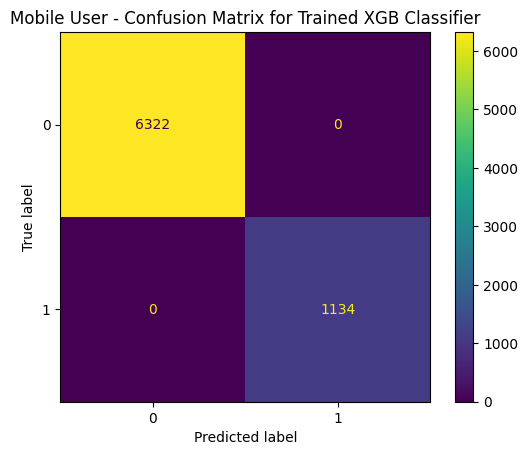

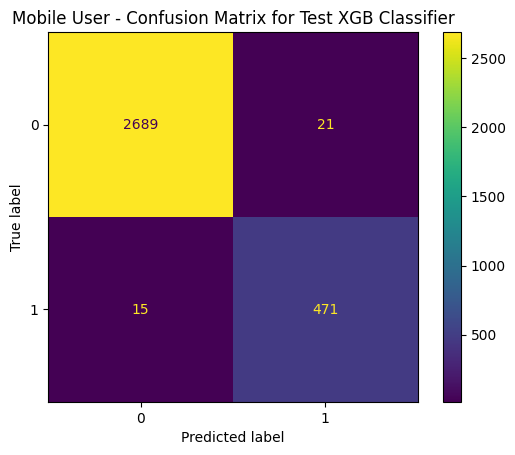

In [132]:
from sklearn.metrics import ConfusionMatrixDisplay

xgb_mb_train_cm=confusion_matrix(y_train_mb, y_xgb_train_mb_predicted)
xgb_mb_test_cm=confusion_matrix(y_test_mb, y_xgb_test_mb_predicted)

ConfusionMatrixDisplay(confusion_matrix=xgb_mb_train_cm, display_labels=mb_xgb_model.classes_).plot()
plt.grid(False)
plt.title('Mobile User - Confusion Matrix for Trained XGB Classifier')
plt.show();

ConfusionMatrixDisplay(confusion_matrix=xgb_mb_test_cm, display_labels=mb_xgb_model.classes_).plot()
plt.grid(False)
plt.title('Mobile User - Confusion Matrix for Test XGB Classifier')
plt.show();

AUC for train data for Logistic Regression: 1.000
AUC for test data for Logistic Regression: 0.998


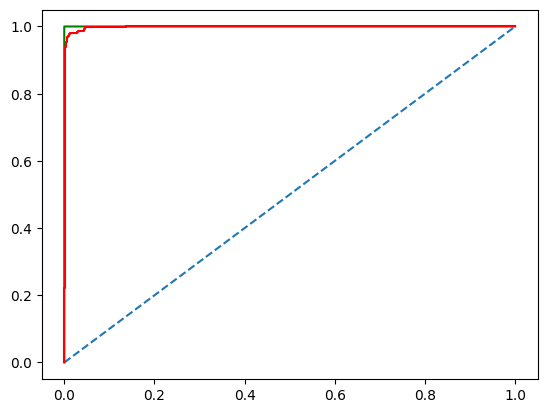

In [133]:
# Code to plot ROC AUC Curve for Classification Models

# predict probabilities
xgb_mb_train_predicted = mb_xgb_model.predict_proba(X_train_mb)
# keep probabilities for the positive outcome only
xgb_mb_train_prob_predicted = xgb_mb_train_predicted[:,1]
# calculate AUC
xgb_mb_auc_train = roc_auc_score(y_train_mb, xgb_mb_train_prob_predicted)
print('AUC for train data for Logistic Regression: %.3f' % xgb_mb_auc_train)
#
# predict probabilities
xgb_mb_test_predicted = mb_xgb_model.predict_proba(X_test_mb)
# keep probabilities for the positive outcome only
xgb_mb_test_prob_predicted = xgb_mb_test_predicted[:,1]
# calculate AUC
xgb_mb_auc_test = roc_auc_score(y_test_mb, xgb_mb_test_prob_predicted)
print('AUC for test data for Logistic Regression: %.3f' % xgb_mb_auc_test)

# calculate roc curve
xgb_mb_train_fpr, xgb_mb_train_tpr, xgb_mb_train_thresholds = roc_curve(y_train_mb, xgb_mb_train_prob_predicted)
xgb_mb_test_fpr, xgb_mb_test_tpr, xgb_mb_test_thresholds = roc_curve(y_test_mb, xgb_mb_test_prob_predicted)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_mb_train_fpr, xgb_mb_train_tpr, color='g')
plt.plot(xgb_mb_test_fpr, xgb_mb_test_tpr, color='r')
plt.show();

## VI. Artificial Neural Network Model

### Artificial Neural Network for Laptop users

In [134]:
import tensorflow as tf

ann_lp_model = tf.keras.Sequential()
ann_lp_model.add(tf.keras.layers.InputLayer(input_shape=X_train_lp.shape[1]))
ann_lp_model.add(tf.keras.layers.BatchNormalization())
ann_lp_model.add(tf.keras.layers.Dense(256, activation='relu'))
ann_lp_model.add(tf.keras.layers.Dense(128, activation='relu'))
ann_lp_model.add(tf.keras.layers.Dense(64, activation='relu'))
ann_lp_model.add(tf.keras.layers.Dense(32, activation='relu'))
ann_lp_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
ann_lp_model.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001), metrics=['accuracy'])

In [135]:
ann_lp_model.fit(X_train_lp, y_train_lp, validation_split=0.2, epochs=1000, batch_size=32)

Epoch 1/1000
20/20 [==============================] - 1s 13ms/step - loss: 0.5473 - accuracy: 0.7532 - val_loss: 2.8109 - val_accuracy: 0.6839
Epoch 2/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.4441 - accuracy: 0.8194 - val_loss: 1.6417 - val_accuracy: 0.6839
Epoch 3/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.3840 - accuracy: 0.8597 - val_loss: 1.4234 - val_accuracy: 0.6839
Epoch 4/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.3218 - accuracy: 0.8790 - val_loss: 1.0968 - val_accuracy: 0.6839
Epoch 5/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.2775 - accuracy: 0.9000 - val_loss: 0.7669 - val_accuracy: 0.7097
Epoch 6/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.2256 - accuracy: 0.9210 - val_loss: 0.6945 - val_accuracy: 0.7290
Epoch 7/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.1921 - accuracy: 0.9355 - val_loss: 0.3853 - val_accuracy: 0.8129
Epoch

In [136]:
ann_lp_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Bat  (None, 14)                56        
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 256)               3840      
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                      

In [137]:
from sklearn.metrics import classification_report, confusion_matrix

y_ann_train_lp_predicted_proba = ann_lp_model.predict(X_train_lp).reshape(len(X_train_lp),1)
y_ann_test_lp_predicted_proba = ann_lp_model.predict(X_test_lp).reshape(len(X_test_lp),1)

y_ann_train_lp_predicted = [ 1 if i >= 0.29 else 0 for i in y_ann_train_lp_predicted_proba]
y_ann_test_lp_predicted = [ 1 if i >=0.29 else 0 for i in y_ann_test_lp_predicted_proba]


print('Classification Report for Training data for Laptop Users-\n',classification_report(y_train_lp, y_ann_train_lp_predicted))
print('\n\n\nClassification Report for Test data for Laptop Users-\n',classification_report(y_test_lp, y_ann_test_lp_predicted))

11/11 [==============================] - 0s 2ms/step
Classification Report for Training data for Laptop Users-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      0.99      0.99       193

    accuracy                           1.00       775
   macro avg       1.00      0.99      1.00       775
weighted avg       1.00      1.00      1.00       775




Classification Report for Test data for Laptop Users-
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       250
           1       0.99      0.90      0.94        83

    accuracy                           0.97       333
   macro avg       0.98      0.95      0.96       333
weighted avg       0.97      0.97      0.97       333



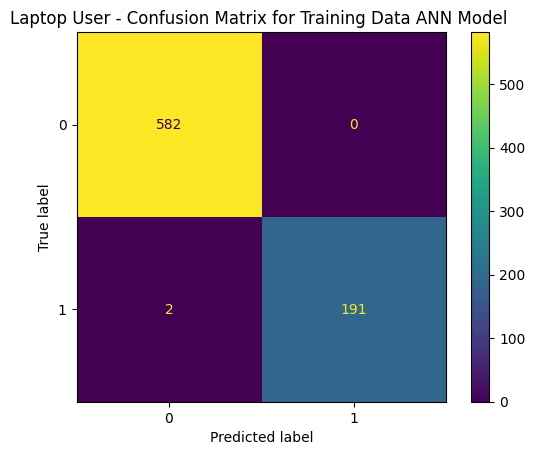

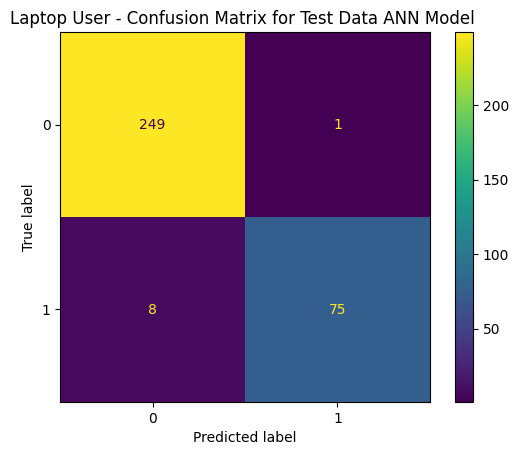

In [138]:
from sklearn.metrics import ConfusionMatrixDisplay

ann_lp_train_cm=confusion_matrix(y_train_lp, y_ann_train_lp_predicted)
ann_lp_test_cm=confusion_matrix(y_test_lp, y_ann_test_lp_predicted)

ConfusionMatrixDisplay(confusion_matrix=ann_lp_train_cm, display_labels=['0','1']).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Training Data ANN Model ')
plt.show();

ConfusionMatrixDisplay(confusion_matrix=ann_lp_test_cm, display_labels=['0','1']).plot()
plt.grid(False)
plt.title('Laptop User - Confusion Matrix for Test Data ANN Model ')
plt.show();

AUC for train data for Logistic Regression: 1.000
AUC for test data for Logistic Regression: 0.995


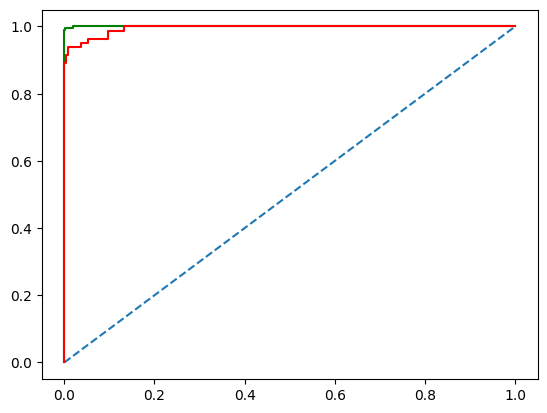

In [139]:
# Code to plot ROC AUC Curve for Classification Models
from sklearn.metrics import roc_auc_score, roc_curve

# calculate AUC
ann_lp_auc_train = roc_auc_score(y_train_lp, y_ann_train_lp_predicted_proba)
print('AUC for train data for Logistic Regression: %.3f' % ann_lp_auc_train)

# calculate AUC
ann_lp_auc_test = roc_auc_score(y_test_lp, y_ann_test_lp_predicted_proba)
print('AUC for test data for Logistic Regression: %.3f' % ann_lp_auc_test)

# calculate roc curve
ann_lp_train_fpr, ann_lp_train_tpr, ann_lp_train_thresholds = roc_curve(y_train_lp, y_ann_train_lp_predicted_proba)
ann_lp_test_fpr, ann_lp_test_tpr, ann_lp_test_thresholds = roc_curve(y_test_lp, y_ann_test_lp_predicted_proba)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_lp_train_fpr, ann_lp_train_tpr, color='g')
plt.plot(ann_lp_test_fpr, ann_lp_test_tpr, color='r')
plt.show();

### Artificial Neural Network for Mobile users

In [140]:
ann_mb_model = tf.keras.Sequential()
ann_mb_model.add(tf.keras.layers.InputLayer(input_shape=X_train_mb.shape[1]))
ann_mb_model.add(tf.keras.layers.BatchNormalization())
ann_mb_model.add(tf.keras.layers.Dense(256, activation='relu'))
ann_mb_model.add(tf.keras.layers.Dense(128, activation='relu'))
ann_mb_model.add(tf.keras.layers.Dense(64, activation='relu'))
ann_mb_model.add(tf.keras.layers.Dense(32, activation='relu'))
ann_mb_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
ann_mb_model.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001), metrics=['accuracy'])

In [141]:
ann_mb_model.fit(X_train_mb, y_train_mb, validation_split=0.2, epochs=500, batch_size=32)

Epoch 1/500
187/187 [==============================] - 2s 4ms/step - loss: 0.3782 - accuracy: 0.8508 - val_loss: 0.3585 - val_accuracy: 0.8673
Epoch 2/500
187/187 [==============================] - 1s 3ms/step - loss: 0.3363 - accuracy: 0.8667 - val_loss: 0.3140 - val_accuracy: 0.8854
Epoch 3/500
187/187 [==============================] - 1s 3ms/step - loss: 0.3226 - accuracy: 0.8744 - val_loss: 0.3027 - val_accuracy: 0.8861
Epoch 4/500
187/187 [==============================] - 1s 3ms/step - loss: 0.2965 - accuracy: 0.8783 - val_loss: 0.2984 - val_accuracy: 0.8827
Epoch 5/500
187/187 [==============================] - 1s 3ms/step - loss: 0.2724 - accuracy: 0.8865 - val_loss: 0.2651 - val_accuracy: 0.9062
Epoch 6/500
187/187 [==============================] - 1s 3ms/step - loss: 0.2435 - accuracy: 0.9016 - val_loss: 0.2476 - val_accuracy: 0.9109
Epoch 7/500
187/187 [==============================] - 1s 4ms/step - loss: 0.2237 - accuracy: 0.9095 - val_loss: 0.2224 - val_accuracy: 0.9176

In [142]:
from sklearn.metrics import classification_report, confusion_matrix

y_ann_train_mb_predicted_proba = ann_mb_model.predict(X_train_mb).reshape(len(X_train_mb),1)
y_ann_test_mb_predicted_proba = ann_mb_model.predict(X_test_mb).reshape(len(X_test_mb),1)

y_ann_train_mb_predicted = [ 1 if i >= 0.29 else 0 for i in y_ann_train_mb_predicted_proba]
y_ann_test_mb_predicted = [ 1 if i >=0.29 else 0 for i in y_ann_test_mb_predicted_proba]


print('Classification Report for Training data for Mobile Users-\n',classification_report(y_train_mb, y_ann_train_mb_predicted))
print('\n\n\nClassification Report for Test data for Mobile Users-\n',classification_report(y_test_mb, y_ann_test_mb_predicted))

100/100 [==============================] - 0s 1ms/step
Classification Report for Training data for Mobile Users-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6322
           1       0.99      0.99      0.99      1134

    accuracy                           1.00      7456
   macro avg       0.99      0.99      0.99      7456
weighted avg       1.00      1.00      1.00      7456




Classification Report for Test data for Mobile Users-
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2710
           1       0.94      0.94      0.94       486

    accuracy                           0.98      3196
   macro avg       0.97      0.96      0.97      3196
weighted avg       0.98      0.98      0.98      3196



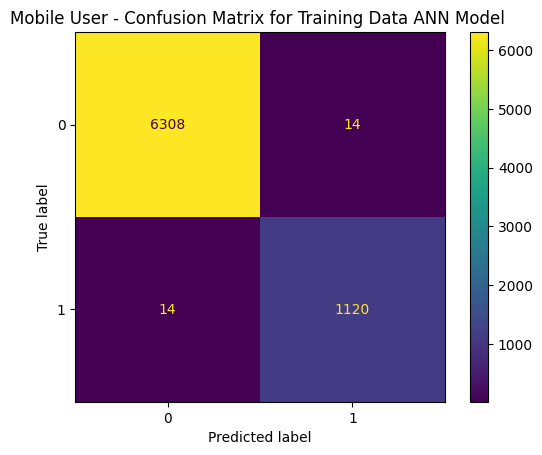

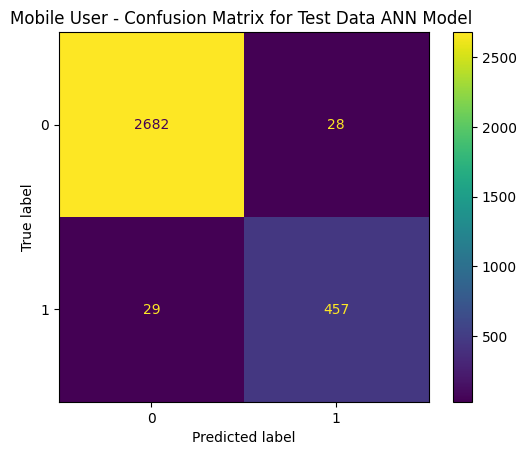

In [143]:
from sklearn.metrics import ConfusionMatrixDisplay

ann_mb_train_cm=confusion_matrix(y_train_mb, y_ann_train_mb_predicted)
ann_mb_test_cm=confusion_matrix(y_test_mb, y_ann_test_mb_predicted)

ConfusionMatrixDisplay(confusion_matrix=ann_mb_train_cm, display_labels=['0','1']).plot()
plt.grid(False)
plt.title('Mobile User - Confusion Matrix for Training Data ANN Model ')
plt.show();

ConfusionMatrixDisplay(confusion_matrix=ann_mb_test_cm, display_labels=['0','1']).plot()
plt.grid(False)
plt.title('Mobile User - Confusion Matrix for Test Data ANN Model ')
plt.show();

AUC for train data for Logistic Regression: 0.999
AUC for test data for Logistic Regression: 0.992


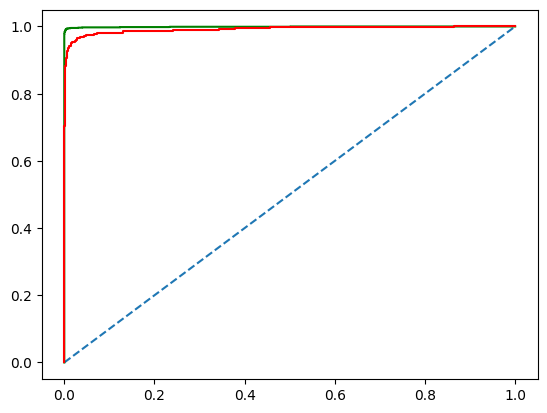

In [144]:
# Code to plot ROC AUC Curve for Classification Models
from sklearn.metrics import roc_auc_score, roc_curve

# calculate AUC
ann_mb_auc_train = roc_auc_score(y_train_mb, y_ann_train_mb_predicted_proba)
print('AUC for train data for Logistic Regression: %.3f' % ann_mb_auc_train)

# calculate AUC
ann_mb_auc_test = roc_auc_score(y_test_mb, y_ann_test_mb_predicted_proba)
print('AUC for test data for Logistic Regression: %.3f' % ann_mb_auc_test)

# calculate roc curve
ann_mb_train_fpr, ann_mb_train_tpr, ann_mb_train_thresholds = roc_curve(y_train_mb, y_ann_train_mb_predicted_proba)
ann_mb_test_fpr, ann_mb_test_tpr, ann_mb_test_thresholds = roc_curve(y_test_mb, y_ann_test_mb_predicted_proba)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_mb_train_fpr, ann_mb_train_tpr, color='g')
plt.plot(ann_mb_test_fpr, ann_mb_test_tpr, color='r')
plt.show();

## Performance Metrics for all the models. Select the best model

In [145]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [146]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(pred_train, pred_test, train_roc_auc_score, test_roc_auc_score, device='laptop'):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    if device =='laptop':
      y_train = y_train_lp
      y_test = y_test_lp
    else:
      y_train = y_train_mb
      y_test = y_test_mb


    train_acc = metrics.accuracy_score(y_train, pred_train)
    test_acc = metrics.accuracy_score(y_test, pred_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)


    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_roc_auc_score, test_roc_auc_score))

    return score_list # returning the list with train and test scores

## Performance metrics of basic models for Laptop Users

In [147]:
# performance metrics of basic models

training_prediction = [y_lr_train_lp_predicted , y_dt_train_lp_predicted, y_knn_train_lp_predicted, y_rf_train_lp_predicted,
                       y_ann_train_lp_predicted]

test_prediction = [y_lr_test_lp_predicted, y_dt_test_lp_predicted, y_knn_test_lp_predicted, y_rf_test_lp_predicted,
                   y_ann_test_lp_predicted]

train_roc_auc_score = [lr_lp_auc_train, dt_lp_auc_train, knn_lp_auc_train, rf_lp_auc_train, ann_lp_auc_train]


test_roc_auc_score = [lr_lp_auc_test, dt_lp_auc_test, knn_lp_auc_test, rf_lp_auc_test, ann_lp_auc_test]

# defining empty lists to add train and test results
lp_acc_train = []
lp_acc_test = []
lp_recall_train = []
lp_recall_test = []
lp_roc_auc_train = []
lp_roc_auc_test = []

# looping through all the models to get the accuracy, precall and precision scores
for idx in range(0, 5):
        j = get_metrics_score(training_prediction[idx], test_prediction[idx], train_roc_auc_score[idx], test_roc_auc_score[idx], device='laptop')
        lp_acc_train.append(np.round(j[0],2))
        lp_acc_test.append(np.round(j[1],2))
        lp_recall_train.append(np.round(j[2],2))
        lp_recall_test.append(np.round(j[3],2))
        lp_roc_auc_train.append(np.round(j[4],2))
        lp_roc_auc_test.append(np.round(j[5],2))


basic_models_for_laptop = pd.DataFrame({'Model':['Logistic Regression', 'CART', 'KNN', 'Random Forest', 'Basic ANN'],
                                     'TrainAccuracy': lp_acc_train,'TestAccuracy': lp_acc_test,
                                     'Train_Recall':lp_recall_train,'TestRecall':lp_recall_test,
                                     'TrainAUC': lp_roc_auc_train, 'TestAUC': lp_roc_auc_test
                                    })
basic_models_for_laptop

,Model,TrainAccuracy,TestAccuracy,Train_Recall,TestRecall,TrainAUC,TestAUC
0,Logistic Regression,0.70000,0.74000,0.62000,0.66000,0.74000,0.79000
1,CART,1.00000,0.93000,1.00000,0.86000,1.00000,0.91000
2,KNN,0.99000,0.91000,0.97000,0.72000,1.00000,0.95000
3,Random Forest,1.00000,0.95000,1.00000,0.81000,1.00000,1.00000
4,Basic ANN,1.00000,0.97000,0.99000,0.90000,1.00000,0.99000


## Performance metrics of Hyper Parameter Tuned models for Laptop Users

In [148]:
# defining list of models

training_prediction = [y_gs_lr_train_lp_predicted, y_gs_dt_train_lp_predicted, y_gs_knn_train_lp_predicted, y_gs_rf_train_lp_predicted,
                       y_xgb_train_lp_predicted]

test_prediction = [y_gs_lr_test_lp_predicted, y_gs_dt_test_lp_predicted, y_gs_knn_test_lp_predicted, y_gs_rf_test_lp_predicted, y_xgb_test_lp_predicted]

train_roc_auc_score = [lr_gs_lp_auc_train, dt_gs_lp_auc_train, knn_gs_lp_auc_train, rf_gs_lp_auc_train, xgb_lp_auc_train]

test_roc_auc_score = [lr_gs_lp_auc_test, dt_gs_lp_auc_test, knn_gs_lp_auc_test, rf_gs_lp_auc_test, xgb_lp_auc_test]

# defining empty lists to add train and test results
tuned_lp_acc_train = []
tuned_lp_acc_test = []
tuned_lp_recall_train = []
tuned_lp_recall_test = []
tuned_lp_roc_auc_train = []
tuned_lp_roc_auc_test = []

# looping through all the models to get the accuracy, precall and precision scores
for idx in range(0, 5):
        j = get_metrics_score(training_prediction[idx], test_prediction[idx], train_roc_auc_score[idx], test_roc_auc_score[idx],
                              device='laptop')
        tuned_lp_acc_train.append(np.round(j[0],2))
        tuned_lp_acc_test.append(np.round(j[1],2))
        tuned_lp_recall_train.append(np.round(j[2],2))
        tuned_lp_recall_test.append(np.round(j[3],2))
        tuned_lp_roc_auc_train.append(np.round(j[4],2))
        tuned_lp_roc_auc_test.append(np.round(j[5],2))


tuned_models_for_laptop = pd.DataFrame({'Model':['Tuned Logistic Regression','CART Tuned','KNN Tuned' ,'Random Forest Tuned',
                                                 'Gradient Boosting'],
                                     'TrainAccuracy': tuned_lp_acc_train,'TestAccuracy': tuned_lp_acc_test,
                                     'Train_Recall':tuned_lp_recall_train,'TestRecall':tuned_lp_recall_test,
                                     'TrainAUC': tuned_lp_roc_auc_train, 'TestAUC': tuned_lp_roc_auc_test
                                    })
tuned_models_for_laptop

,Model,TrainAccuracy,TestAccuracy,Train_Recall,TestRecall,TrainAUC,TestAUC
0,Tuned Logistic Regression,0.79000,0.80000,0.69000,0.67000,0.82000,0.85000
1,CART Tuned,0.82000,0.80000,0.89000,0.86000,0.93000,0.89000
2,KNN Tuned,1.00000,0.96000,1.00000,0.92000,1.00000,0.99000
3,Random Forest Tuned,1.00000,0.97000,1.00000,0.95000,1.00000,0.99000
4,Gradient Boosting,1.00000,0.97000,1.00000,0.95000,1.00000,1.00000


## Performance metrics of basic models for Mobile Users

In [149]:
# defining list of models

training_prediction = [y_lr_train_mb_predicted , y_dt_train_mb_predicted, y_knn_train_mb_predicted, y_rf_train_mb_predicted,
                       y_ann_train_mb_predicted]

test_prediction = [y_lr_test_mb_predicted, y_dt_test_mb_predicted, y_knn_test_mb_predicted, y_rf_test_mb_predicted,
                   y_ann_test_mb_predicted]

train_roc_auc_score = [lr_mb_auc_train, dt_mb_auc_train, knn_mb_auc_train, rf_mb_auc_train, ann_mb_auc_train]

test_roc_auc_score = [lr_mb_auc_test, dt_mb_auc_test, knn_mb_auc_test, rf_mb_auc_test, ann_mb_auc_test]

# defining empty lists to add train and test results
mb_acc_train = []
mb_acc_test = []
mb_recall_train = []
mb_recall_test = []
mb_roc_auc_train = []
mb_roc_auc_test = []

# looping through all the models to get the accuracy, precall and precision scores
for idx in range(0, 5):
        j = get_metrics_score(training_prediction[idx], test_prediction[idx], train_roc_auc_score[idx], test_roc_auc_score[idx],
                              device='mobile')
        mb_acc_train.append(np.round(j[0],2))
        mb_acc_test.append(np.round(j[1],2))
        mb_recall_train.append(np.round(j[2],2))
        mb_recall_test.append(np.round(j[3],2))
        mb_roc_auc_train.append(np.round(j[4],2))
        mb_roc_auc_test.append(np.round(j[5],2))


basic_models_for_mobile = pd.DataFrame({'Model':['Logistic Regression', 'CART', 'KNN', 'Random Forest','Basic ANN'],
                                     'TrainAccuracy': mb_acc_train,'TestAccuracy': mb_acc_test,
                                     'Train_Recall':mb_recall_train,'TestRecall':mb_recall_test,
                                     'TrainAUC': mb_roc_auc_train, 'TestAUC': mb_roc_auc_test
                                    })
basic_models_for_mobile

,Model,TrainAccuracy,TestAccuracy,Train_Recall,TestRecall,TrainAUC,TestAUC
0,Logistic Regression,0.83000,0.84000,0.16000,0.18000,0.68000,0.71000
1,CART,1.00000,0.97000,1.00000,0.89000,1.00000,0.94000
2,KNN,0.99000,0.96000,0.96000,0.84000,1.00000,0.98000
3,Random Forest,1.00000,0.98000,1.00000,0.86000,1.00000,1.00000
4,Basic ANN,1.00000,0.98000,0.99000,0.94000,1.00000,0.99000


## Performance metrics of Hyper Parameter Tuned models for Mobile Users

In [150]:
# defining list of models

training_prediction = [y_gs_lr_train_mb_predicted, y_gs_dt_train_mb_predicted, y_gs_knn_train_mb_predicted, y_gs_rf_train_mb_predicted,
                       y_xgb_train_mb_predicted]

test_prediction = [y_gs_lr_test_mb_predicted, y_gs_dt_test_mb_predicted, y_gs_knn_test_mb_predicted, y_gs_rf_test_mb_predicted,
                   y_xgb_test_mb_predicted]

train_roc_auc_score = [lr_gs_mb_auc_train, dt_gs_mb_auc_train, knn_gs_mb_auc_train, rf_gs_mb_auc_train, xgb_mb_auc_train]

test_roc_auc_score = [lr_gs_mb_auc_test, dt_gs_mb_auc_test, knn_gs_mb_auc_train, rf_gs_mb_auc_test, xgb_mb_auc_test]

# defining empty lists to add train and test results
tuned_mb_acc_train = []
tuned_mb_acc_test = []
tuned_mb_recall_train = []
tuned_mb_recall_test = []
tuned_mb_roc_auc_train = []
tuned_mb_roc_auc_test = []

# looping through all the models to get the accuracy, precall and precision scores
for idx in range(0, 5):
        j = get_metrics_score(training_prediction[idx], test_prediction[idx], train_roc_auc_score[idx], test_roc_auc_score[idx],
                              device='mobile')
        tuned_mb_acc_train.append(np.round(j[0],2))
        tuned_mb_acc_test.append(np.round(j[1],2))
        tuned_mb_recall_train.append(np.round(j[2],2))
        tuned_mb_recall_test.append(np.round(j[3],2))
        tuned_mb_roc_auc_train.append(np.round(j[4],2))
        tuned_mb_roc_auc_test.append(np.round(j[5],2))


tuned_models_for_mobile = pd.DataFrame({'Model':['Tuned Logistic Regression','CART Tuned','Tuned KNN', 'Random Forest Tuned',
                                                 'Gradient Boosting'],
                                     'TrainAccuracy': tuned_mb_acc_train,'TestAccuracy': tuned_mb_acc_test,
                                     'Train_Recall':tuned_mb_recall_train,'TestRecall':tuned_mb_recall_test,
                                     'TrainAUC': tuned_mb_roc_auc_train, 'TestAUC': tuned_mb_roc_auc_test
                                    })
tuned_models_for_mobile

,Model,TrainAccuracy,TestAccuracy,Train_Recall,TestRecall,TrainAUC,TestAUC
0,Tuned Logistic Regression,0.84000,0.83000,0.46000,0.40000,0.79000,0.79000
1,CART Tuned,1.00000,0.98000,1.00000,0.91000,1.00000,0.95000
2,Tuned KNN,1.00000,0.99000,1.00000,0.96000,1.00000,1.00000
3,Random Forest Tuned,1.00000,0.98000,1.00000,0.97000,1.00000,1.00000
4,Gradient Boosting,1.00000,0.99000,1.00000,0.97000,1.00000,1.00000


## Feature Importance from Extreme Gradient Boosting Models for Laptop users

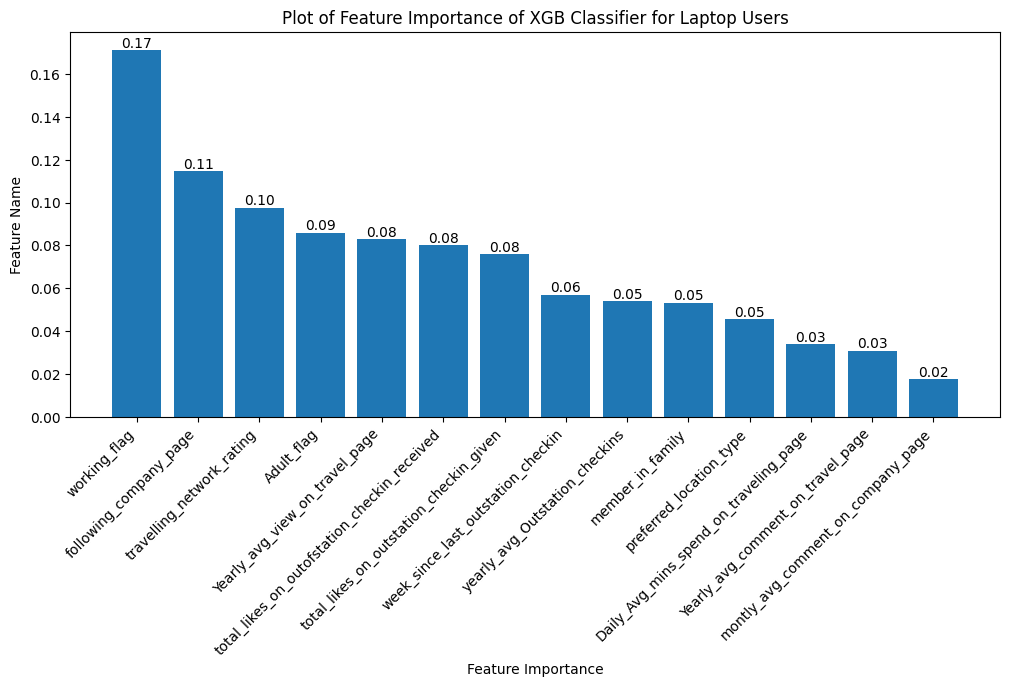

In [151]:
# Sort the important features in descending order.
dt_sorted_index = lp_xgb_model.feature_importances_.argsort()
dt_important_features_values = lp_xgb_model.feature_importances_[dt_sorted_index][::-1]

# Get the feature names.
dt_feature_names = X_train_lp.columns[dt_sorted_index][::-1]

# Plotting the important features.
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(X_train_lp.columns[dt_sorted_index][::-1], lp_xgb_model.feature_importances_[dt_sorted_index][::-1])
for label in ax.containers:
    ax.bar_label(label, fmt='%.2f')
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature Name')
ax.set_title('Plot of Feature Importance of XGB Classifier for Laptop Users')
# ax.set_xticks(dt_sorted_index)
ax.set_xticklabels(X_train_lp.columns[dt_sorted_index][::-1], rotation=45, ha='right')
plt.show();

## Feature Importance from Extreme Gradient Boosting Models for Mobile users

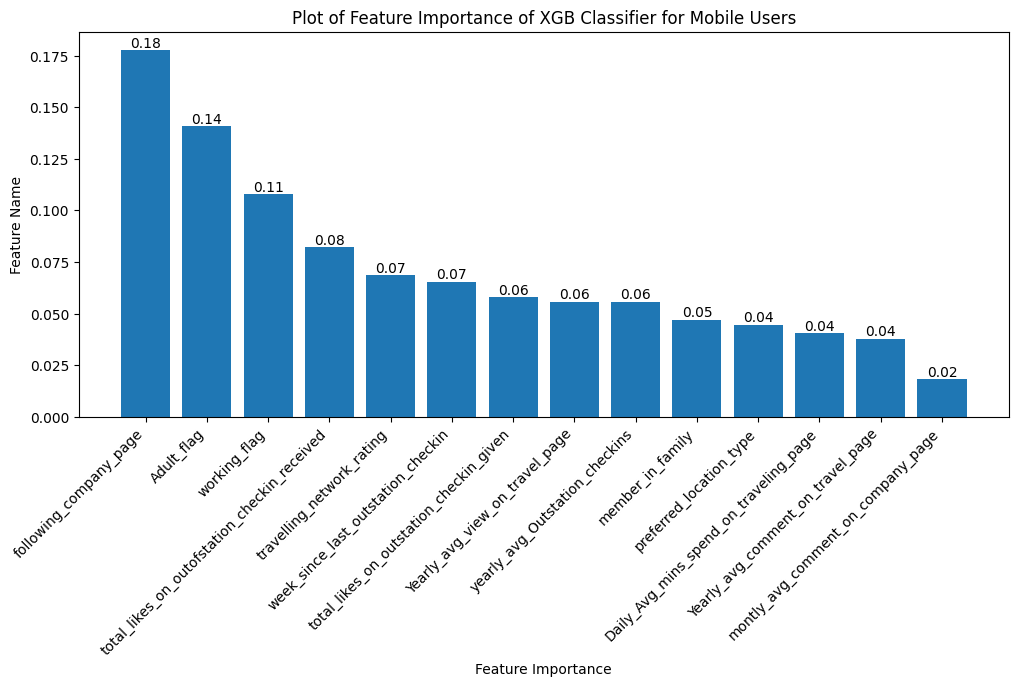

In [152]:
# Sort the important features in descending order.
dt_sorted_index = mb_xgb_model.feature_importances_.argsort()
dt_important_features_values = mb_xgb_model.feature_importances_[dt_sorted_index][::-1]

# Get the feature names.
dt_feature_names = X_train_mb.columns[dt_sorted_index][::-1]

# Plotting the important features.
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(X_train_mb.columns[dt_sorted_index][::-1], mb_xgb_model.feature_importances_[dt_sorted_index][::-1])
for label in ax.containers:
    ax.bar_label(label, fmt='%.2f')
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature Name')
ax.set_title('Plot of Feature Importance of XGB Classifier for Mobile Users')
ax.set_xticklabels(X_train_mb.columns[dt_sorted_index][::-1], rotation=45, ha='right')
plt.show();

## 1). Model building and interpretation
### a. Build various models (You can choose to build models for either or all of descriptive, predictive or prescriptive purposes)
### b. Test your predictive model against the test set using various appropriate performance metrics
### c. Interpretation of the model(s)

## 2). Model Tuning and business implication
### a. Ensemble modelling (if necessary)
### b. Any other model tuning measures (if applicable)
### c. Interpretation of the most optimum model and its implication on the business